# Compare the CIGALE results of EMU and non-EMU sources

In [3]:
observatory = '/data/mfonseca/'
my_computer = '/home/polaris/Lab_Astro/data/'

directory = my_computer

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import math


# Astropy
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
# Use the Planck 2020/2018 cosmology
from astropy.cosmology import Planck18 as cosmo

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
from matplotlib.colors import TwoSlopeNorm
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted

# Kolmogorov-Smirnov test
from scipy.stats import gaussian_kde
from scipy.stats import kstest

# Seaborn
import seaborn as sns

# Custom color palette
set2_colors = sns.color_palette('Paired')
custom_palette = [set2_colors[1], set2_colors[5]]

sns.color_palette(custom_palette)


[(0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745)]

/home/polaris/miniconda3/envs/labastro/lib/python3.10/site-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


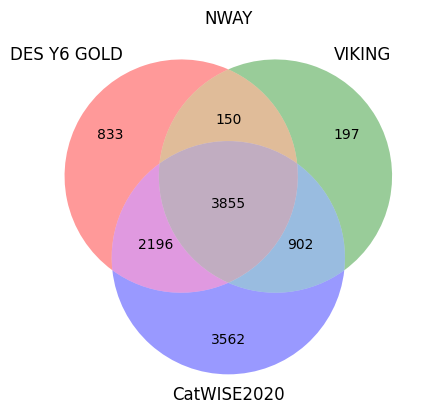

In [4]:
v = venn3_unweighted(subsets=(833, 197, 150, 3562, 2196, 902, 3855), set_labels = ('DES Y6 GOLD', 'VIKING', 'CatWISE2020'))
 
#c = venn3_circles(subsets=(833, 197, 150, 3562, 2196, 902, 3855))
 
plt.title("NWAY")
 
plt.show()

## Import results files from EMU and non-EMU sources and select objects with x²_red < 5

In [5]:
emu_sources_table = Table.read('/home/polaris/Lab_Astro/data/cigale/emu_data/out_withAGN_1/EMU_0102-32_DESY6GOLD_VIKINGDR5_CATWISE_noMag_CIGALE.fits', format='fits')
emu_sources = emu_sources_table.to_pandas()
nonemu_sources = pd.read_csv('/home/polaris/Lab_Astro/data/cigale/nonemu_data/nonemu_sample_1/results.txt', sep='\s+')
nonemu_prototypes = pd.read_csv('/home/polaris/Lab_Astro/data/cigale/nonemu_data/nonemu_prototypes/results.txt', sep='\s+')
nonemu_samp_prots = pd.read_csv('/home/polaris/Lab_Astro/data/cigale/nonemu_data/out/results.txt', sep='\s+')

Select EMU and non-EMU sources with a x²_red less than 5 , to analyse sources with a good fitting.

In [6]:
# EMU sources
best_matches_emu = emu_sources['best.reduced_chi_square'] <= 5.0
emu_sources_best = emu_sources[best_matches_emu].copy()
print(f'Number of emu objects with x²_red <= 5: {len(emu_sources_best)}/{len(emu_sources)}')
emu_sources_best['bayes.sfh.sfr_permass'] =  emu_sources_best['bayes.sfh.sfr']/emu_sources_best['bayes.stellar.m_star']
emu_sources_best['best.sfh.sfr_permass'] =  emu_sources_best['best.sfh.sfr']/emu_sources_best['best.stellar.m_star']

# Non-EMU with same g-mag distribution as EMU
best_matches_nonemu = nonemu_sources['best.reduced_chi_square'] <= 5.0
nonemu_sources_best = nonemu_sources[best_matches_nonemu].copy()
print(f'Number of non-emu objects with x²_red <= 5: {len(nonemu_sources_best)}/{len(nonemu_sources)}')
nonemu_sources_best['bayes.sfh.sfr_permass'] =  nonemu_sources_best['bayes.sfh.sfr']/nonemu_sources_best['bayes.stellar.m_star']

# Prototypes
best_matches_nonemu_prots = nonemu_prototypes['best.reduced_chi_square'] <= 5.0
nonemu_prototypes_best = nonemu_prototypes[best_matches_nonemu_prots].copy()
print(f'Number of non-emu prototypes with x²_red <= 5: {len(nonemu_prototypes_best)}/{len(nonemu_prototypes)}')
nonemu_prototypes_best['bayes.sfh.sfr_permass'] =  nonemu_prototypes_best['bayes.sfh.sfr']/nonemu_prototypes_best['bayes.stellar.m_star']

# Non-EMU sample with original distribution (BMUs of the prototypes)
best_matches_nonemu_samp_prots = nonemu_samp_prots['best.reduced_chi_square'] <= 5.0
nonemu_samp_prots_best = nonemu_samp_prots[best_matches_nonemu_samp_prots].copy()
print(f'Number of non-emu prototypes with x²_red <= 5: {len(nonemu_samp_prots_best)}/{len(nonemu_samp_prots_best)}')
nonemu_samp_prots_best['bayes.sfh.sfr_permass'] =  nonemu_samp_prots_best['bayes.sfh.sfr']/nonemu_samp_prots_best['bayes.stellar.m_star']
nonemu_samp_prots_best['best.sfh.sfr_permass'] =  nonemu_samp_prots_best['best.sfh.sfr']/nonemu_samp_prots_best['best.stellar.m_star']

Number of emu objects with x²_red <= 5: 3506/3530
Number of non-emu objects with x²_red <= 5: 3053/3530
Number of non-emu prototypes with x²_red <= 5: 2693/2756
Number of non-emu prototypes with x²_red <= 5: 4843/4843


In [25]:
# Add filtering to ensure we keep the values whose errors are not too high
# def filter_by_error(df, column):
#     return df[(df[column+'_err'] < df[column])]

# emu_sources_best = filter_by_error(emu_sources_best, 'bayes.sfh.sfr')
# emu_sources_best = filter_by_error(emu_sources_best, 'bayes.stellar.m_star')
# nonemu_sources_best = filter_by_error(nonemu_sources_best, 'bayes.sfh.sfr')
# nonemu_sources_best = filter_by_error(nonemu_sources_best, 'bayes.stellar.m_star')

## Average Values

In [26]:
def simple_avg_and_error(values):    
    avg = np.mean(values)
    avg_error = np.std(values)
    return avg, avg_error

In [27]:
print("EMU values")

emu_avg_stellarmass, emu_err_stellarmass = simple_avg_and_error(np.log10(emu_sources_best['bayes.stellar.m_star']))
print(r'Stellar Mass:', f'{emu_avg_stellarmass:.4f} ± {emu_err_stellarmass:.4f}')

emu_avg_sfr, emu_err_sfr = simple_avg_and_error(np.log10(emu_sources_best['bayes.sfh.sfr']))
print(r'Star Formation Rate:', f'{emu_avg_sfr:.4f} ± {emu_err_sfr:.4f}')

emu_avg_ssfr, emu_err_ssfr = simple_avg_and_error(np.log10(emu_sources_best['bayes.sfh.sfr']/emu_sources_best['bayes.stellar.m_star']))
print(r'Specific Star Formation Rate:', f'{emu_avg_ssfr:.4f} ± {emu_err_ssfr:.4f}')

emu_avg_metallicity, emu_err_metallicity = simple_avg_and_error(emu_sources_best['bayes.stellar.metallicity'])
print(r'Metallicity:', f'{emu_avg_metallicity:.4f} ± {emu_err_metallicity:.4f}')

emu_avg_age, emu_err_age = simple_avg_and_error(np.log10(emu_sources_best['bayes.sfh.age']))
print(r'Age:', f'{emu_avg_age:.4f} ± {emu_err_age:.4f}')

emu_avg_Av_BC, emu_err_Av_BC = simple_avg_and_error(emu_sources_best['bayes.attenuation.Av_BC'])
print(r'Av_BC:', f'{emu_avg_Av_BC:.4f} ± {emu_err_Av_BC:.4f}')

emu_avg_AGN, emu_err_AGN = simple_avg_and_error(emu_sources_best['bayes.agn.fracAGN'])
print(r'AGN Fraction:', f'{emu_avg_AGN:.4f} ± {emu_err_AGN:.4f}')

emu_avg_red, emu_err_red = simple_avg_and_error(emu_sources_best['bayes.universe.redshift'])
print(r'Redshift:', f'{emu_avg_red:.4f} ± {emu_err_red:.4f}')

EMU values
Stellar Mass: 10.9886 ± 0.3883
Star Formation Rate: 1.4641 ± 0.9209
Specific Star Formation Rate: -9.5245 ± 0.8353
Metallicity: 0.0231 ± 0.0086
Age: 3.5321 ± 0.2048
Av_BC: 0.5038 ± 0.2867
AGN Fraction: 0.1952 ± 0.1228
Redshift: 0.6791 ± 0.4624


In [28]:
print("NON EMU - Sample with the same distribution as the original set of non-EMU sources")

nonemu_samp_prots_stellarmass, nonemu_samp_prots_err_stellarmass = simple_avg_and_error(np.log10(nonemu_samp_prots_best['bayes.stellar.m_star']))
print(r'Stellar Mass:', f'{nonemu_samp_prots_stellarmass:.4f} ± {nonemu_samp_prots_err_stellarmass:.4f}')

nonemu_samp_prots_sfr, nonemu_samp_prots_err_sfr = simple_avg_and_error(np.log10(nonemu_samp_prots_best['bayes.sfh.sfr']))
print(r'Star Formation Rate:', f'{nonemu_samp_prots_sfr:.4f} ± {nonemu_samp_prots_err_sfr:.4f}')

nonemu_samp_prots_ssfr, nonemu_samp_prots_err_ssfr = simple_avg_and_error(np.log10(nonemu_samp_prots_best['bayes.sfh.sfr']/nonemu_samp_prots_best['bayes.stellar.m_star']))
print(r'Specific Star Formation Rate:', f'{nonemu_samp_prots_ssfr:.4f} ± {nonemu_samp_prots_err_ssfr:.4f}')

nonemu_samp_prots_metallicity, nonemu_samp_prots_err_metallicity = simple_avg_and_error(nonemu_samp_prots_best['bayes.stellar.metallicity'])
print(r'Metallicity:', f'{nonemu_samp_prots_metallicity:.4f} ± {nonemu_samp_prots_err_metallicity:.4f}')

nonemu_samp_prots_age, nonemu_samp_prots_err_age = simple_avg_and_error(np.log10(nonemu_samp_prots_best['bayes.sfh.age']))
print(r'Age:', f'{nonemu_samp_prots_age:.4f} ± {nonemu_samp_prots_err_age:.4f}')

nonemu_samp_prots_Av_BC, nonemu_samp_prots_err_Av_BC = simple_avg_and_error(nonemu_samp_prots_best['bayes.attenuation.Av_BC'])
print(r'Av_BC:', f'{nonemu_samp_prots_Av_BC:.4f} ± {nonemu_samp_prots_err_Av_BC:.4f}')

nonemu_samp_prots_AGN, nonemu_samp_prots_err_AGN = simple_avg_and_error(nonemu_samp_prots_best['bayes.agn.fracAGN'])
print(r'AGN Fraction:', f'{nonemu_samp_prots_AGN:.4f} ± {nonemu_samp_prots_err_AGN:.4f}')

nonemu_samp_prots_red, nonemu_samp_prots_err_red = simple_avg_and_error(nonemu_samp_prots_best['bayes.universe.redshift'])
print(r'Redshift:', f'{nonemu_samp_prots_red:.4f} ± {nonemu_samp_prots_err_red:.4f}')

NON EMU - Sample with the same distribution as the original set of non-EMU sources
Stellar Mass: 10.3754 ± 0.8060
Star Formation Rate: 0.7293 ± 1.0446
Specific Star Formation Rate: -9.6461 ± 0.8624
Metallicity: 0.0201 ± 0.0081
Age: 3.5439 ± 0.1989
Av_BC: 0.3847 ± 0.2622
AGN Fraction: 0.1650 ± 0.1068
Redshift: 0.5818 ± 0.3858


In [29]:
print("NON EMU - Prototypes")

nonemu_prots_stellarmass, nonemu_prots_err_stellarmass = simple_avg_and_error(np.log10(nonemu_prototypes_best['bayes.stellar.m_star']))
print(r'Stellar Mass:', f'{nonemu_prots_stellarmass:.4f} ± {nonemu_prots_err_stellarmass:.4f}')

nonemu_prots_sfr, nonemu_prots_err_sfr = simple_avg_and_error(np.log10(nonemu_prototypes_best['bayes.sfh.sfr']))
print(r'Star Formation Rate:', f'{nonemu_prots_sfr:.4f} ± {nonemu_prots_err_sfr:.4f}')

nonemu_prots_ssfr, nonemu_prots_err_ssfr = simple_avg_and_error(np.log10(nonemu_prototypes_best['bayes.sfh.sfr']/nonemu_prototypes_best['bayes.stellar.m_star']))
print(r'Specific Star Formation Rate:', f'{nonemu_prots_ssfr:.4f} ± {nonemu_prots_err_ssfr:.4f}')

nonemu_prots_metallicity, nonemu_prots_err_metallicity = simple_avg_and_error(nonemu_prototypes_best['bayes.stellar.metallicity'])
print(r'Metallicity:', f'{nonemu_prots_metallicity:.4f} ± {nonemu_prots_err_metallicity:.4f}')

nonemu_prots_age, nonemu_prots_err_age = simple_avg_and_error(np.log10(nonemu_prototypes_best['bayes.sfh.age']))
print(r'Age:', f'{nonemu_prots_age:.4f} ± {nonemu_prots_err_age:.4f}')

nonemu_prots_Av_BC, nonemu_prots_err_Av_BC = simple_avg_and_error(nonemu_prototypes_best['bayes.attenuation.Av_BC'])
print(r'Av_BC:', f'{nonemu_prots_Av_BC:.4f} ± {nonemu_prots_err_Av_BC:.4f}')

nonemu_prots_AGN, nonemu_prots_err_AGN = simple_avg_and_error(nonemu_prototypes_best['bayes.agn.fracAGN'])
print(r'AGN Fraction:', f'{nonemu_prots_AGN:.4f} ± {nonemu_prots_err_AGN:.4f}')

nonemu_prots_red, nonemu_prots_err_red = simple_avg_and_error(nonemu_prototypes_best['bayes.universe.redshift'])
print(r'Redshift:', f'{nonemu_prots_red:.4f} ± {nonemu_prots_err_red:.4f}')

NON EMU - Prototypes
Stellar Mass: 10.4216 ± 0.6086
Star Formation Rate: 0.9121 ± 0.9414
Specific Star Formation Rate: -9.5095 ± 0.8195
Metallicity: 0.0202 ± 0.0059
Age: 3.5838 ± 0.1771
Av_BC: 0.4248 ± 0.2160
AGN Fraction: 0.1665 ± 0.0837
Redshift: 0.5788 ± 0.4429


In [30]:
print("NON EMU - Sample with the same g-magnitude distribution as EMU sources")


nonemu_avg_stellarmass, nonemu_avg_err_stellarmass = simple_avg_and_error(np.log10(nonemu_sources_best['bayes.stellar.m_star']))
print(r'Stellar Mass:', f'{nonemu_prots_stellarmass:.4f} ± {nonemu_prots_err_stellarmass:.4f}')

nonemu_avg_sfr, nonemu_avg_err_sfr = simple_avg_and_error(np.log10(nonemu_sources_best['bayes.sfh.sfr']))
print(r'Star Formation Rate:', f'{nonemu_prots_sfr:.4f} ± {nonemu_prots_err_sfr:.4f}')

nonemu_avg_ssfr, nonemu_avg_err_ssfr = simple_avg_and_error(np.log10(nonemu_sources_best['bayes.sfh.sfr']/nonemu_sources_best['bayes.stellar.m_star']))
print(r'Specific Star Formation Rate:', f'{nonemu_prots_ssfr:.4f} ± {nonemu_prots_err_ssfr:.4f}')

nonemu_avg_metallicity, nonemu_avg_err_metallicity = simple_avg_and_error(nonemu_sources_best['bayes.stellar.metallicity'])
print(r'Metallicity:', f'{nonemu_prots_metallicity:.4f} ± {nonemu_prots_err_metallicity:.4f}')

nonemu_avg_age, nonemu_avg_err_age = simple_avg_and_error(np.log10(nonemu_sources_best['bayes.sfh.age']))
print(r'Age:', f'{nonemu_prots_age:.4f} ± {nonemu_prots_err_age:.4f}')

nonemu_avg_Av_BC, nonemu_avg_err_Av_BC = simple_avg_and_error(nonemu_sources_best['bayes.attenuation.Av_BC'])
print(r'Av_BC:', f'{nonemu_prots_Av_BC:.4f} ± {nonemu_prots_err_Av_BC:.4f}')

nonemu_avg_AGN, nonemu_avg_err_AGN = simple_avg_and_error(nonemu_sources_best['bayes.agn.fracAGN'])
print(r'AGN Fraction:', f'{nonemu_prots_AGN:.4f} ± {nonemu_prots_err_AGN:.4f}')

nonemu_avg_red, nonemu_avg_err_red = simple_avg_and_error(nonemu_sources_best['bayes.universe.redshift'])
print(r'Redshift:', f'{nonemu_prots_red:.4f} ± {nonemu_prots_err_red:.4f}')

NON EMU - Sample with the same g-magnitude distribution as EMU sources
Stellar Mass: 10.4216 ± 0.6086
Star Formation Rate: 0.9121 ± 0.9414
Specific Star Formation Rate: -9.5095 ± 0.8195
Metallicity: 0.0202 ± 0.0059
Age: 3.5838 ± 0.1771
Av_BC: 0.4248 ± 0.2160
AGN Fraction: 0.1665 ± 0.0837
Redshift: 0.5788 ± 0.4429


## Logarithmic values

In [31]:
# EMU
emu_sources_best['log_stellar_mass'] = np.log10(emu_sources_best['bayes.stellar.m_star'])
emu_sources_best['log_sfr'] = np.log10(emu_sources_best['bayes.sfh.sfr'])
emu_sources_best['log_ssfr'] = np.log10(emu_sources_best['bayes.sfh.sfr'] / emu_sources_best['bayes.stellar.m_star'])
emu_sources_best['log_ssfr_gyrs'] = np.log10((emu_sources_best['bayes.sfh.sfr'] *1e-9/ emu_sources_best['bayes.stellar.m_star']))
emu_sources_best['ssfr_gyrs'] = (emu_sources_best['bayes.sfh.sfr'] *1e9/ emu_sources_best['bayes.stellar.m_star'])
emu_sources_best['log_metallicity'] = np.log10(emu_sources_best['bayes.stellar.metallicity'])
emu_sources_best['log_age'] = np.log10(emu_sources_best['bayes.sfh.age'])
emu_sources_best['log_attenuation'] = np.log10(emu_sources_best['bayes.attenuation.Av_BC'])

In [32]:
# NON EMU - Sample with the same distribution in the g magnitude as EMU
nonemu_sources_best['log_stellar_mass'] = np.log10(nonemu_sources_best['bayes.stellar.m_star'])
nonemu_sources_best['log_sfr'] = np.log10(nonemu_sources_best['bayes.sfh.sfr'])
nonemu_sources_best['log_ssfr'] = np.log10(nonemu_sources_best['bayes.sfh.sfr'] / nonemu_sources_best['bayes.stellar.m_star'])
nonemu_sources_best['log_metallicity'] = np.log10(nonemu_sources_best['bayes.stellar.metallicity'])
nonemu_sources_best['log_age'] = np.log10(nonemu_sources_best['bayes.sfh.age'])
nonemu_sources_best['log_attenuation'] = np.log10(nonemu_sources_best['bayes.attenuation.Av_BC'])

In [33]:
# NON EMU - Sample with the same distribution as the original set of non-EMU sources
nonemu_samp_prots_best['log_stellar_mass'] = np.log10(nonemu_samp_prots_best['bayes.stellar.m_star'])
nonemu_samp_prots_best['log_sfr'] = np.log10(nonemu_samp_prots_best['bayes.sfh.sfr'])
nonemu_samp_prots_best['log_ssfr'] = np.log10(nonemu_samp_prots_best['bayes.sfh.sfr'] / nonemu_samp_prots_best['bayes.stellar.m_star'])
nonemu_samp_prots_best['log_metallicity'] = np.log10(nonemu_samp_prots_best['bayes.stellar.metallicity'])
nonemu_samp_prots_best['log_age'] = np.log10(nonemu_samp_prots_best['bayes.sfh.age'])
nonemu_samp_prots_best['log_attenuation'] = np.log10(nonemu_samp_prots_best['bayes.attenuation.Av_BC'])

In [34]:
# NON EMU - Prototypes
nonemu_prototypes_best['log_stellar_mass'] = np.log10(nonemu_prototypes_best['bayes.stellar.m_star'])
nonemu_prototypes_best['log_sfr'] = np.log10(nonemu_prototypes_best['bayes.sfh.sfr'])
nonemu_prototypes_best['log_ssfr'] = np.log10(nonemu_prototypes_best['bayes.sfh.sfr'] / nonemu_prototypes_best['bayes.stellar.m_star'])
nonemu_prototypes_best['log_metallicity'] = np.log10(nonemu_prototypes_best['bayes.stellar.metallicity'])
nonemu_prototypes_best['log_age'] = np.log10(nonemu_prototypes_best['bayes.sfh.age'])
nonemu_prototypes_best['log_attenuation'] = np.log10(nonemu_prototypes_best['bayes.attenuation.Av_BC'])

## Compare EMU and non-EMU sources

### Diagonal Correlation Matrix

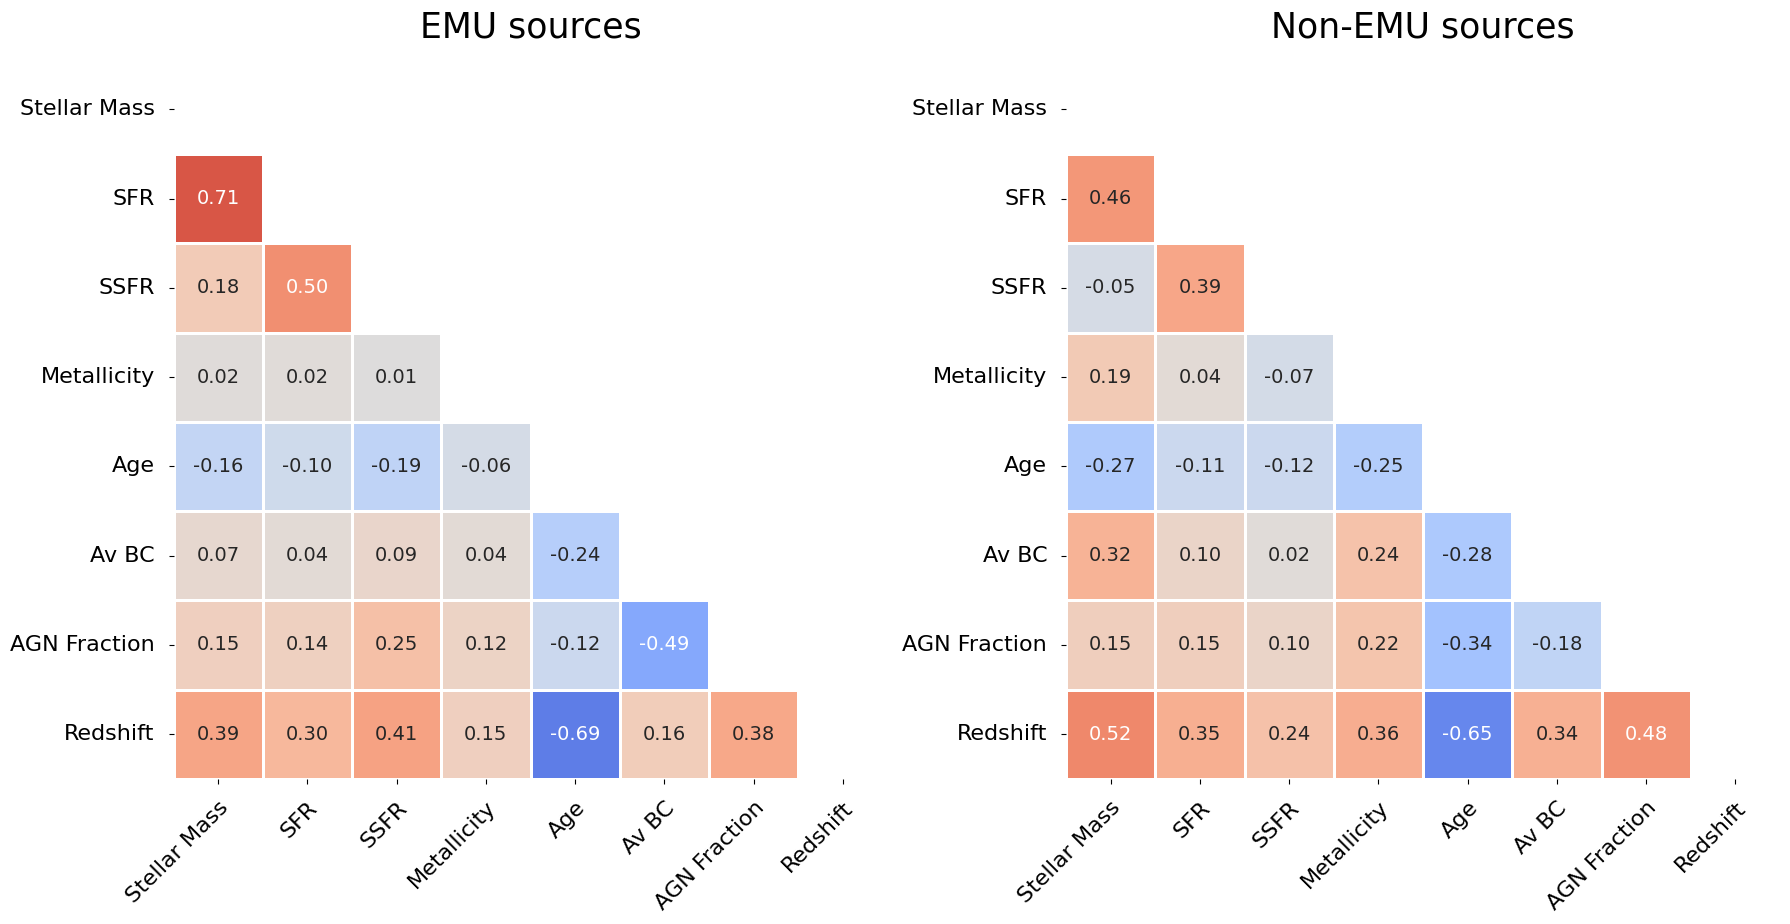

In [35]:
# Prepare the data
emu_sources_best_cols = emu_sources_best[['bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass', 
                                         'bayes.stellar.metallicity', 'bayes.sfh.age', 
                                         'bayes.attenuation.Av_BC', 'bayes.agn.fracAGN', 
                                         'bayes.universe.redshift']]
nonemu_samp_prots_best_cols = nonemu_samp_prots_best[['bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass',
                                              'bayes.stellar.metallicity', 'bayes.sfh.age',
                                              'bayes.attenuation.Av_BC', 'bayes.agn.fracAGN',
                                              'bayes.universe.redshift']]

new_column_labels = {
    'bayes.stellar.m_star': 'Stellar Mass',
    'bayes.sfh.sfr': 'SFR',
    'bayes.sfh.sfr_permass': 'SSFR',
    'bayes.stellar.metallicity': 'Metallicity',
    'bayes.sfh.age': 'Age',
    'bayes.attenuation.Av_BC': 'Av BC',
    'bayes.agn.fracAGN': 'AGN Fraction',
    'bayes.universe.redshift': 'Redshift'
}

# Compute correlation matrices
emu_sources_best_cor = emu_sources_best_cols.corr()
nonemu_samp_prots_best_cor = nonemu_samp_prots_best_cols.corr()

# Rename columns and index
emu_sources_best_cor = emu_sources_best_cor.rename(index=new_column_labels, columns=new_column_labels)
nonemu_samp_prots_best_cor = nonemu_samp_prots_best_cor.rename(index=new_column_labels, columns=new_column_labels)

# Create mask for upper triangle
mask = np.triu(np.ones_like(emu_sources_best_cor, dtype=bool))

# Set up the figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [1, 1]})
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Custom font sizes
title_fontsize = 25
label_fontsize = 18
tick_fontsize = 16
annot_fontsize = 14

# First heatmap (EMU)
sns.heatmap(emu_sources_best_cor, mask=mask, cmap=cmap, vmin=-0.9, vmax=0.9, center=0,
            square=True, linewidths=.75, ax=ax1,
            cbar=False,  
            annot=True, fmt=".2f",
            annot_kws={"size": annot_fontsize})
ax1.set_title('EMU sources', fontsize=title_fontsize, pad=20)

# Second heatmap (Non-EMU)
sns.heatmap(nonemu_samp_prots_best_cor, mask=mask, cmap=cmap, vmin=-0.9, vmax=0.9, center=0,
            square=True, linewidths=.75, ax=ax2,
            cbar=False, 
            annot=True, fmt=".2f",
            annot_kws={"size": annot_fontsize})
ax2.set_title('Non-EMU sources', fontsize=title_fontsize, pad=20)

# Adjust tick labels for both subplots
for ax in [ax1, ax2]:
    # X-axis labels (bottom)
    ax.set_xticklabels(ax.get_xticklabels(), 
                      rotation=45, 
                      ha='right',  # Align to the right
                      rotation_mode='anchor',  # Rotate around anchor point
                      fontsize=tick_fontsize)
    
    # Y-axis labels (left)
    ax.set_yticklabels(ax.get_yticklabels(), 
                       rotation=0, 
                       ha='right',  # Align to the right
                       fontsize=tick_fontsize)
    
    # Adjust layout to prevent label cutoff
    ax.tick_params(axis='both', which='both', pad=10)

# Add a shared colorbar
# cbar_ax = f.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-1, vmax=1))
# f.colorbar(sm, cax=cbar_ax)

plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Leave space for colorbar
plt.show()

### All Properties Plot

In [36]:
%%script true

import matplotlib.lines as mlines
custom_palette = {
    'EMU': cmap(0.0)[:3],
    'Non-EMU': cmap(1.0)[:3]
}

# Define properties
properties = [
    'log_stellar_mass', 'log_sfr', 'log_ssfr',
    'log_metallicity', 'log_age', 'bayes.attenuation.Av_BC',
    'bayes.agn.fracAGN', 'bayes.universe.redshift'
]

emu_sources_best['dataset'] = 'EMU'
nonemu_samp_prots_best['dataset'] = 'Non-EMU'
joined_df = pd.concat([emu_sources_best, nonemu_samp_prots_best], ignore_index=True)

labels = [
    r'$\log_{10}(M_*/M_\odot)$', 
    r'$\log_{10}(\mathrm{SFR})$', 
    r'$\log_{10}(\mathrm{SSFR})$', 
    r'$\log_{10}(Z)$', 
    r'$\log_{10}(\mathrm{Age})$',
    r'$A_V$ (Attenuation)', 
    r'AGN Fraction', 
    r'Redshift'
]

# --- Font Customization ---
xlabel_fontsize = 20
ylabel_fontsize = 20
xtick_fontsize = 15
ytick_fontsize = 15
legend_fontsize = 30

# --- Create PairGrid ---
g = sns.PairGrid(
    joined_df,
    vars=properties,
    hue='dataset',
    corner=True,
    palette=custom_palette
)

# Lower triangle: KDE plots
g.map_lower(
    sns.kdeplot,
    fill=False,
    alpha=1.0,
    thresh=0.05
)

# Diagonal: Histograms
g.map_diag(
    sns.histplot,
    kde=True,
    alpha=0.6
)


for ax, label in zip(g.axes[-1, :], labels):
    ax.set_xlabel(label, fontsize=xlabel_fontsize)
    ax.tick_params(axis='x', labelsize=xtick_fontsize)

for ax, label in zip(g.axes[:, 0], labels):
    ax.set_ylabel(label, fontsize=ylabel_fontsize)
    ax.tick_params(axis='y', labelsize=ytick_fontsize)

# Create custom legend handles with desired linewidth
legend_handles = [
    mlines.Line2D([], [], color=custom_palette['EMU'], linewidth=5, label='EMU'), # Adjust linewidth here
    mlines.Line2D([], [], color=custom_palette['Non-EMU'], linewidth=5, label='Non-EMU') # Adjust linewidth here
]

# Add the custom legend to the PairGrid's figure
g.figure.legend(
    handles=legend_handles,
    bbox_to_anchor=(0.9, 0.5), # Adjust position as needed
    fontsize=legend_fontsize,
    frameon=True,
    framealpha=1
)

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.savefig('/home/polaris/Lab_Astro/images/allproperties.png', dpi=200)
plt.show()



### Histogram of EMU and non-EMU sources

In [37]:
from scipy.stats import ks_2samp

def plot_log_hist_percent_2rows_sns(
    df1, df2, columns, x_labels, legend_positions,
    labels, titles, values1, values2, errors1, errors2, path,
    figsize=(25, 10), bins=50,
    title_fontsize=25,
    xlabel_fontsize=22,
    ylabel_fontsize=22,
    xtick_fontsize=25,
    ytick_fontsize=25,
    legend_fontsize=12,
    color1='#0000ff',
    color2='#fb0404',
):

    n = len(columns)
    nrows = 2
    ncols = math.ceil(n / nrows)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, squeeze=False)

    # Pre-calculate bins
    extended_bins = {}
    for col in columns:
        if col == 'bayes.universe.redshift':
                extended_bins[col] = bins  # No predefined bins, automatic by hist()
        elif ('bayes.agn.fracAGN' in col) or ('bayes.stellar.metallicity' in col) or \
                ('bayes.attenuation.Av_BC' in col):
            min_val = min(df1[col].min(), df2[col].min())
            max_val = max(df1[col].max(), df2[col].max())
            extended_bins[col] = np.linspace(min_val, max_val, bins)
        else:
            data1 = df1[col][df1[col] > 0]
            data2 = df2[col][df2[col] > 0]
            if not data1.empty:
                min_val = data1.min()
                max_val = data1.max()
                if not data2.empty:
                    min_val = min(min_val, data2.min())
                    max_val = max(max_val, data2.max())
                extended_bins[col] = np.logspace(np.log10(min_val), np.log10(max_val), bins)
            elif not data2.empty:
                min_val = data2.min()
                max_val = data2.max()
                extended_bins[col] = np.logspace(np.log10(min_val), np.log10(max_val), bins)
            else:
                extended_bins[col] = np.logspace(0, 1, bins)

    for i, col in enumerate(columns):
        row = i // ncols
        col_idx = i % ncols
        ax = axes[row, col_idx]

        data1 = df1[col]
        data2 = df2[col]

        # KS test
        if ('bayes.agn.fracAGN' in col) or ('bayes.stellar.metallicity' in col) or \
           ('bayes.universe.redshift' in col) or ('bayes.attenuation.Av_BC' in col):
            ks_stat, ks_p = ks_2samp(data1.dropna(), data2.dropna())
        else:
            data1 = data1[data1 > 0]
            data2 = data2[data2 > 0]
            ks_stat, ks_p = ks_2samp(data1.dropna(), data2.dropna())

        if ('bayes.agn.fracAGN' in col) or ('bayes.stellar.metallicity' in col) or \
           ('bayes.universe.redshift' in col) or ('bayes.attenuation.Av_BC' in col):
            ax.hist(
                data1,
                bins=extended_bins[col],
                weights=np.ones_like(data1) * 100 / len(data1),
                alpha=0.45,
                label=labels[0],
                color=color1
            )
            ax.hist(
                data2,
                bins=extended_bins[col],
                weights=np.ones_like(data2) * 100 / len(data2),
                alpha=0.45,
                label=labels[1],
                color=color2
            )

            
            if col == 'bayes.stellar.metallicity':
                ax.axvline(data1.median(), color=color1, linestyle='dashed', linewidth=2.0,
                       label=f'{values1[i]:.3f} ± {errors1[i]:.3f}')
                ax.axvline(data2.median(), color=color2, linestyle='dashed', linewidth=2.0,
                       label=f'{values2[i]:.3f} ± {errors2[i]:.3f}')
            else:
                ax.axvline(data1.median(), color=color1, linestyle='dashed', linewidth=2.0,
                       label=f'{values1[i]:.2f} ± {errors1[i]:.2f}')
                ax.axvline(data2.median(), color=color2, linestyle='dashed', linewidth=2.0,
                       label=f'{values2[i]:.2f} ± {errors2[i]:.2f}')

        else:
            ax.hist(
                data1,
                bins=extended_bins[col],
                weights=np.ones_like(data1) * 100 / len(data1),
                alpha=0.45,
                label=labels[0],
                color=color1
            )
            ax.hist(
                data2,
                bins=extended_bins[col],
                weights=np.ones_like(data2) * 100 / len(data2),
                alpha=0.45,
                label=labels[1],
                color=color2
            )
            ax.set_xscale('log')
            ax.axvline(data1.median(), color=color1, linestyle='dashed', linewidth=2.0,
                       label=f'10^({values1[i]:.2f} ± {errors1[i]:.2f})')
            ax.axvline(data2.median(), color=color2, linestyle='dashed', linewidth=2.0,
                       label=f'10^({values2[i]:.2f} ± {errors2[i]:.2f})')

            # Padding
            if ('bayes.sfh.sfr' == col) or ('bayes.sfh.age' == col):
                x_min, x_max = ax.get_xlim()
                if x_min > 0:
                    log_min = np.log10(x_min)
                    log_max = np.log10(x_max)
                    log_pad_left = 0.3 * (log_max - log_min)
                    ax.set_xlim(10**(log_min - log_pad_left), x_max)
            else:
                x_min, x_max = ax.get_xlim()
                if x_min > 0:
                    log_min = np.log10(x_min)
                    log_max = np.log10(x_max)
                    log_pad = 0.001 * (log_max - log_min)
                    ax.set_xlim(10**(log_min - log_pad), 10**(log_max + log_pad))

        ax.set_xlabel(x_labels[i], fontsize=xlabel_fontsize)
        ax.set_ylabel('Percentage of Sources (%)', fontsize=ylabel_fontsize)
        ax.tick_params(axis='x', labelsize=xtick_fontsize)
        ax.tick_params(axis='y', labelsize=ytick_fontsize)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
        ax.set_title(titles[i], fontsize=title_fontsize, pad=20)
        ax.legend(loc=legend_positions[i], fontsize=legend_fontsize)

    # Turn off unused subplots
    for j in range(n, nrows * ncols):
        row = j // ncols
        col_idx = j % ncols
        axes[row, col_idx].axis('off')

    fig.subplots_adjust(
        left=0.05,
        right=0.97,
        top=0.90,
        bottom=0.09,
        wspace=0.30,
        hspace=0.50
    )
    plt.savefig(path, dpi=200)
    plt.show()

#### EMU sources vs Non-EMU

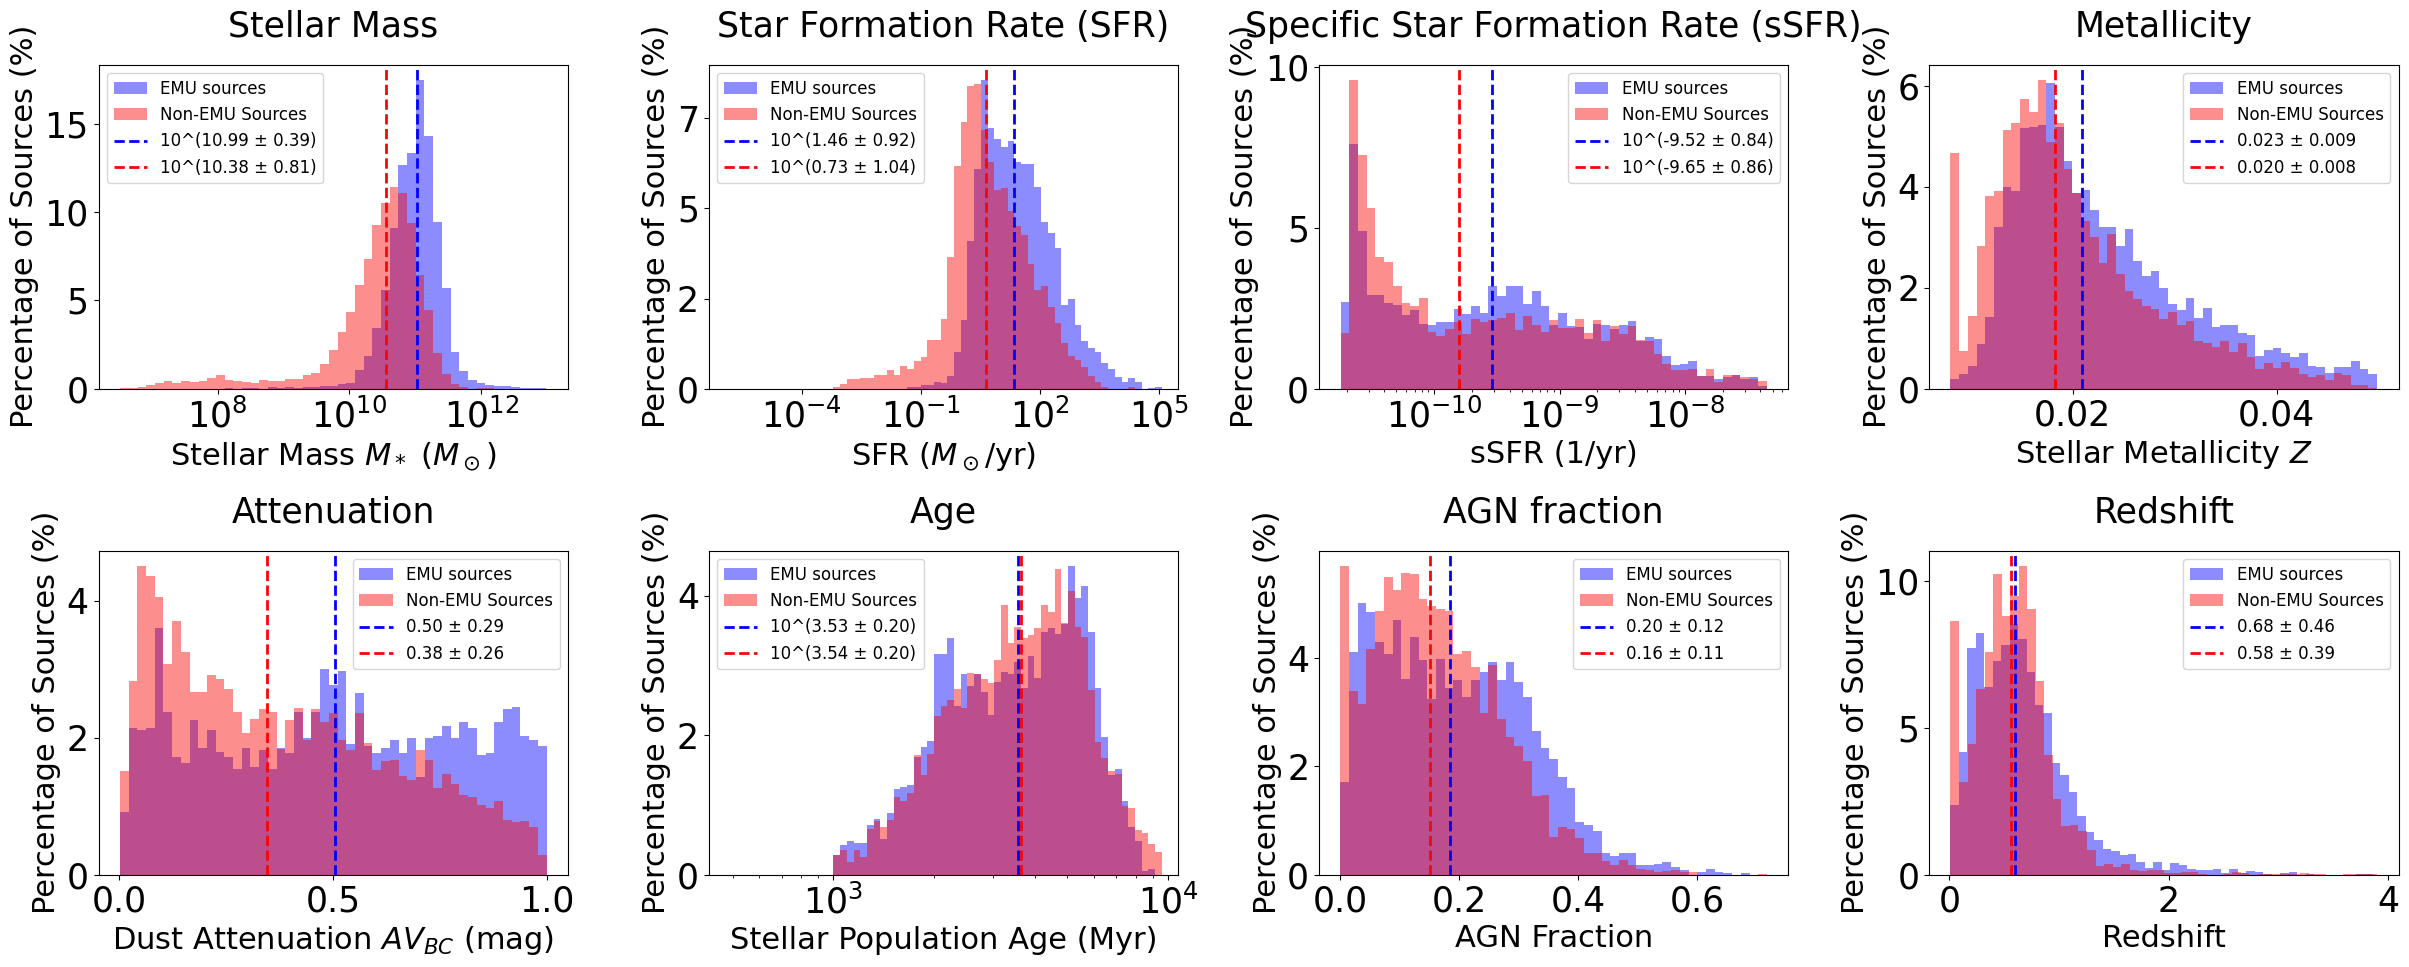

In [38]:
plot_log_hist_percent_2rows_sns(
    df1=emu_sources_best,
    df2=nonemu_samp_prots_best,
    columns=[
        'bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass','bayes.stellar.metallicity',
        'bayes.attenuation.Av_BC', 'bayes.sfh.age', 'bayes.agn.fracAGN', 'bayes.universe.redshift'
    ],
    x_labels=[
        r"Stellar Mass $M_*$ ($M_\odot$)",
        r"SFR ($M_\odot$/yr)",
        r"sSFR (1/yr)",
        r"Stellar Metallicity $Z$",
        r"Dust Attenuation $AV_{BC}$ (mag)",
        r"Stellar Population Age (Myr)",
        r"AGN Fraction",
        r"Redshift"
    ],
    labels=("EMU sources", "Non-EMU Sources"),
    legend_positions= ['upper left', 'upper left', 'upper right', 'upper right','upper right','upper left','upper right','upper right' ],
    titles = ['Stellar Mass', 'Star Formation Rate (SFR)', 'Specific Star Formation Rate (sSFR)', 'Metallicity', 'Attenuation', 'Age', 'AGN fraction', 'Redshift'],
    values1=[emu_avg_stellarmass, emu_avg_sfr, emu_avg_ssfr, emu_avg_metallicity, emu_avg_Av_BC, emu_avg_age, emu_avg_AGN, emu_avg_red],
    errors1=[emu_err_stellarmass, emu_err_sfr, emu_err_ssfr, emu_err_metallicity, emu_err_Av_BC, emu_err_age, emu_err_AGN, emu_err_red],
    values2=[nonemu_samp_prots_stellarmass, nonemu_samp_prots_sfr,nonemu_samp_prots_ssfr, nonemu_samp_prots_metallicity, nonemu_samp_prots_Av_BC, nonemu_samp_prots_age, nonemu_samp_prots_AGN, nonemu_samp_prots_red],
    errors2=[nonemu_samp_prots_err_stellarmass, nonemu_samp_prots_err_sfr, nonemu_samp_prots_err_ssfr, nonemu_samp_prots_err_metallicity, nonemu_samp_prots_err_Av_BC, nonemu_samp_prots_err_age, nonemu_samp_prots_err_AGN, nonemu_samp_prots_err_red],

    color1='#0000ff',
    color2='#fb0404',
    path = '/home/polaris/Lab_Astro/images/emu_vs_nonemu.png'
)

#### EMU sources vs Non-EMU (with the same distribution in the g magnitude)

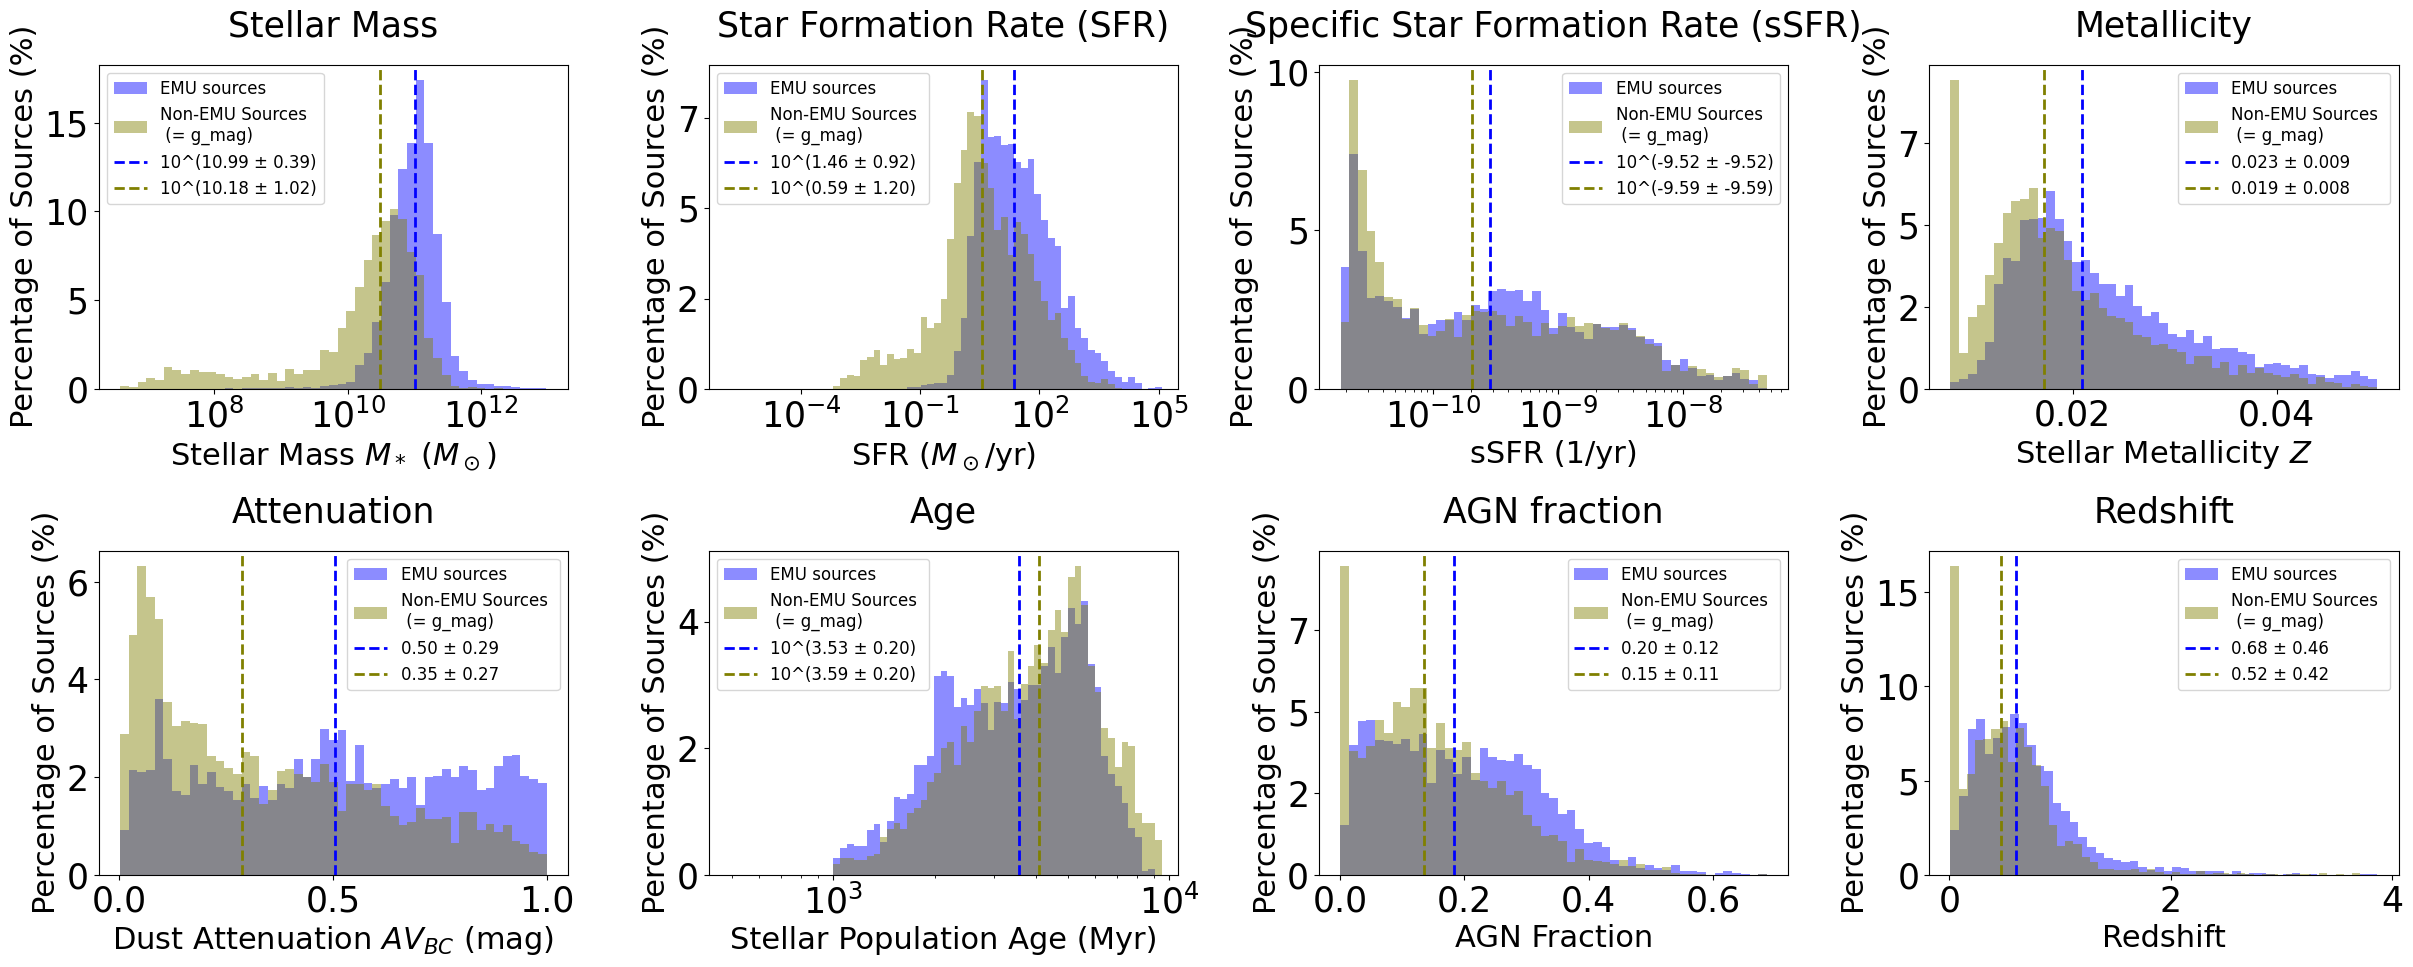

In [40]:
#%%script true
plot_log_hist_percent_2rows_sns(
    df1=emu_sources_best,
    df2=nonemu_sources_best,
    columns=[
        'bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass','bayes.stellar.metallicity',
        'bayes.attenuation.Av_BC', 'bayes.sfh.age', 'bayes.agn.fracAGN', 'bayes.universe.redshift'
    ],
    x_labels=[
        r"Stellar Mass $M_*$ ($M_\odot$)",
        r"SFR ($M_\odot$/yr)",
        r"sSFR (1/yr)",
        r"Stellar Metallicity $Z$",
        r"Dust Attenuation $AV_{BC}$ (mag)",
        r"Stellar Population Age (Myr)",
        r"AGN Fraction",
        r"Redshift"
    ],
    labels=("EMU sources", "Non-EMU Sources \n (= g_mag)"),
    legend_positions= ['upper left', 'upper left', 'upper right', 'upper right','upper right','upper left','upper right','upper right' ],
    titles = ['Stellar Mass', 'Star Formation Rate (SFR)', 'Specific Star Formation Rate (sSFR)', 'Metallicity', 'Attenuation', 'Age', 'AGN fraction', 'Redshift'],
    values1=[emu_avg_stellarmass, emu_avg_sfr, emu_avg_ssfr, emu_avg_metallicity, emu_avg_Av_BC, emu_avg_age, emu_avg_AGN, emu_avg_red],
    errors1=[emu_err_stellarmass, emu_err_sfr, emu_avg_ssfr, emu_err_metallicity, emu_err_Av_BC, emu_err_age, emu_err_AGN, emu_err_red],
    values2=[nonemu_avg_stellarmass, nonemu_avg_sfr, nonemu_avg_ssfr, nonemu_avg_metallicity, nonemu_avg_Av_BC, nonemu_avg_age, nonemu_avg_AGN, nonemu_avg_red],
    errors2=[nonemu_avg_err_stellarmass, nonemu_avg_err_sfr, nonemu_avg_ssfr, nonemu_avg_err_metallicity, nonemu_avg_err_Av_BC, nonemu_avg_err_age, nonemu_avg_err_AGN, nonemu_avg_err_red],
    color2='olive',
    path = '/home/polaris/Lab_Astro/images/emu_vs_nonemu_gsamp.png'
)

#### Non-EMU sample vs Non-EMU prototypes

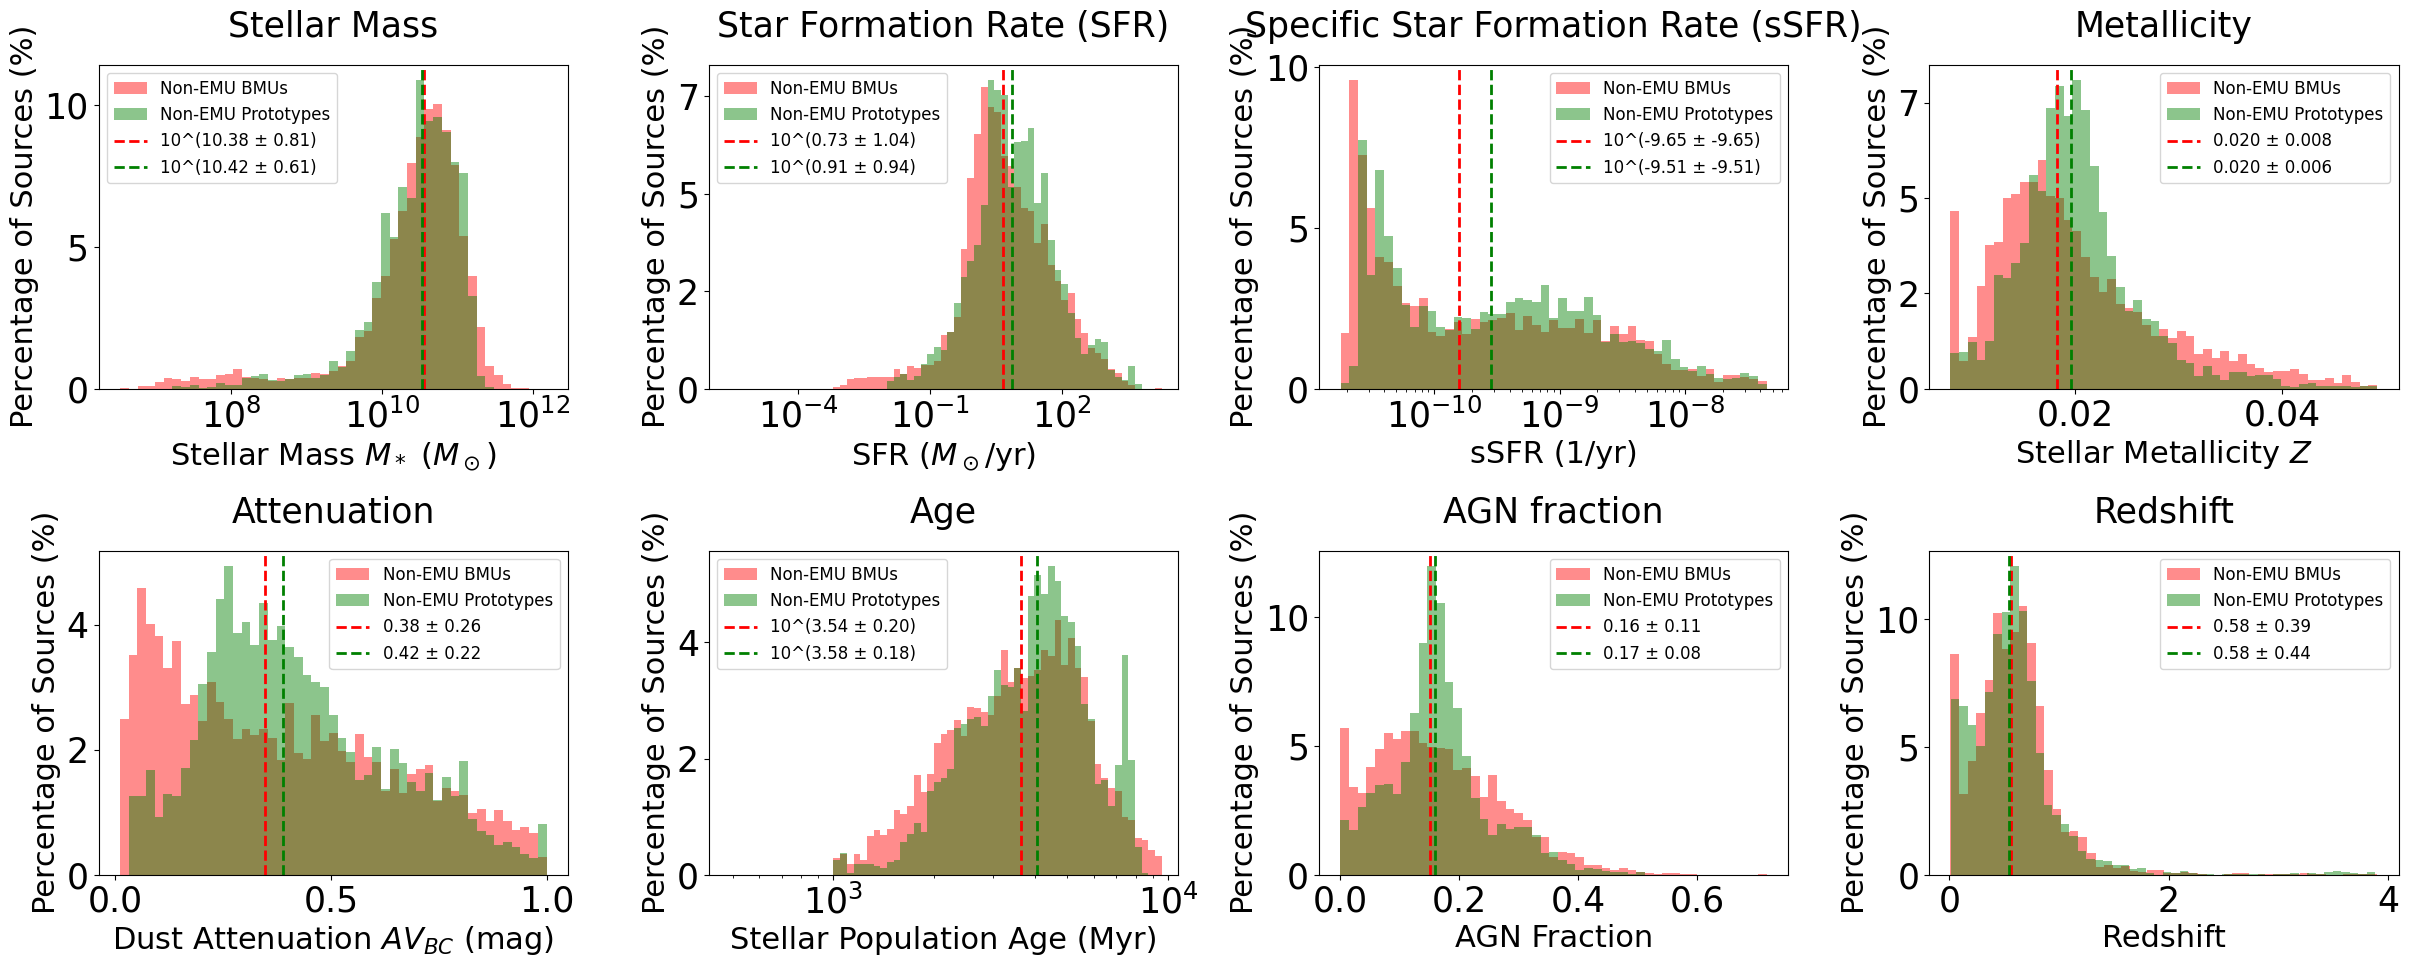

: 

In [ ]:
plot_log_hist_percent_2rows_sns(
    df1=nonemu_samp_prots_best,
    df2=nonemu_prototypes_best,
    columns=[
        'bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass','bayes.stellar.metallicity',
        'bayes.attenuation.Av_BC', 'bayes.sfh.age', 'bayes.agn.fracAGN', 'bayes.universe.redshift'
    ],
    x_labels=[
        r"Stellar Mass $M_*$ ($M_\odot$)",
        r"SFR ($M_\odot$/yr)",
        r"sSFR (1/yr)",
        r"Stellar Metallicity $Z$",
        r"Dust Attenuation $AV_{BC}$ (mag)",
        r"Stellar Population Age (Myr)",
        r"AGN Fraction",
        r"Redshift"
    ],
    labels=("Non-EMU BMUs", "Non-EMU Prototypes"),
    legend_positions= ['upper left', 'upper left', 'upper right', 'upper right','upper right','upper left','upper right','upper right' ],
    titles = ['Stellar Mass', 'Star Formation Rate (SFR)', 'Specific Star Formation Rate (sSFR)', 'Metallicity', 'Attenuation', 'Age', 'AGN fraction', 'Redshift'],
    values1=[nonemu_samp_prots_stellarmass, nonemu_samp_prots_sfr, nonemu_samp_prots_ssfr, nonemu_samp_prots_metallicity, nonemu_samp_prots_Av_BC, nonemu_samp_prots_age, nonemu_samp_prots_AGN, nonemu_samp_prots_red],
    errors1=[nonemu_samp_prots_err_stellarmass, nonemu_samp_prots_err_sfr, nonemu_samp_prots_ssfr, nonemu_samp_prots_err_metallicity, nonemu_samp_prots_err_Av_BC, nonemu_samp_prots_err_age, nonemu_samp_prots_err_AGN, nonemu_samp_prots_err_red],
    values2=[nonemu_prots_stellarmass, nonemu_prots_sfr, nonemu_prots_ssfr, nonemu_prots_metallicity, nonemu_prots_Av_BC, nonemu_prots_age, nonemu_prots_AGN, nonemu_prots_red],
    errors2=[nonemu_prots_err_stellarmass, nonemu_prots_err_sfr, nonemu_prots_ssfr, nonemu_prots_err_metallicity, nonemu_prots_err_Av_BC, nonemu_prots_err_age, nonemu_prots_err_AGN, nonemu_prots_err_red],
    color1='red',
    color2='green',
    path = '/home/polaris/Lab_Astro/images/nonemu_vs_nonemu_prots.png'
)

#### Non-EMU vs Non-EMU (with the same distribution in the g magnitude)

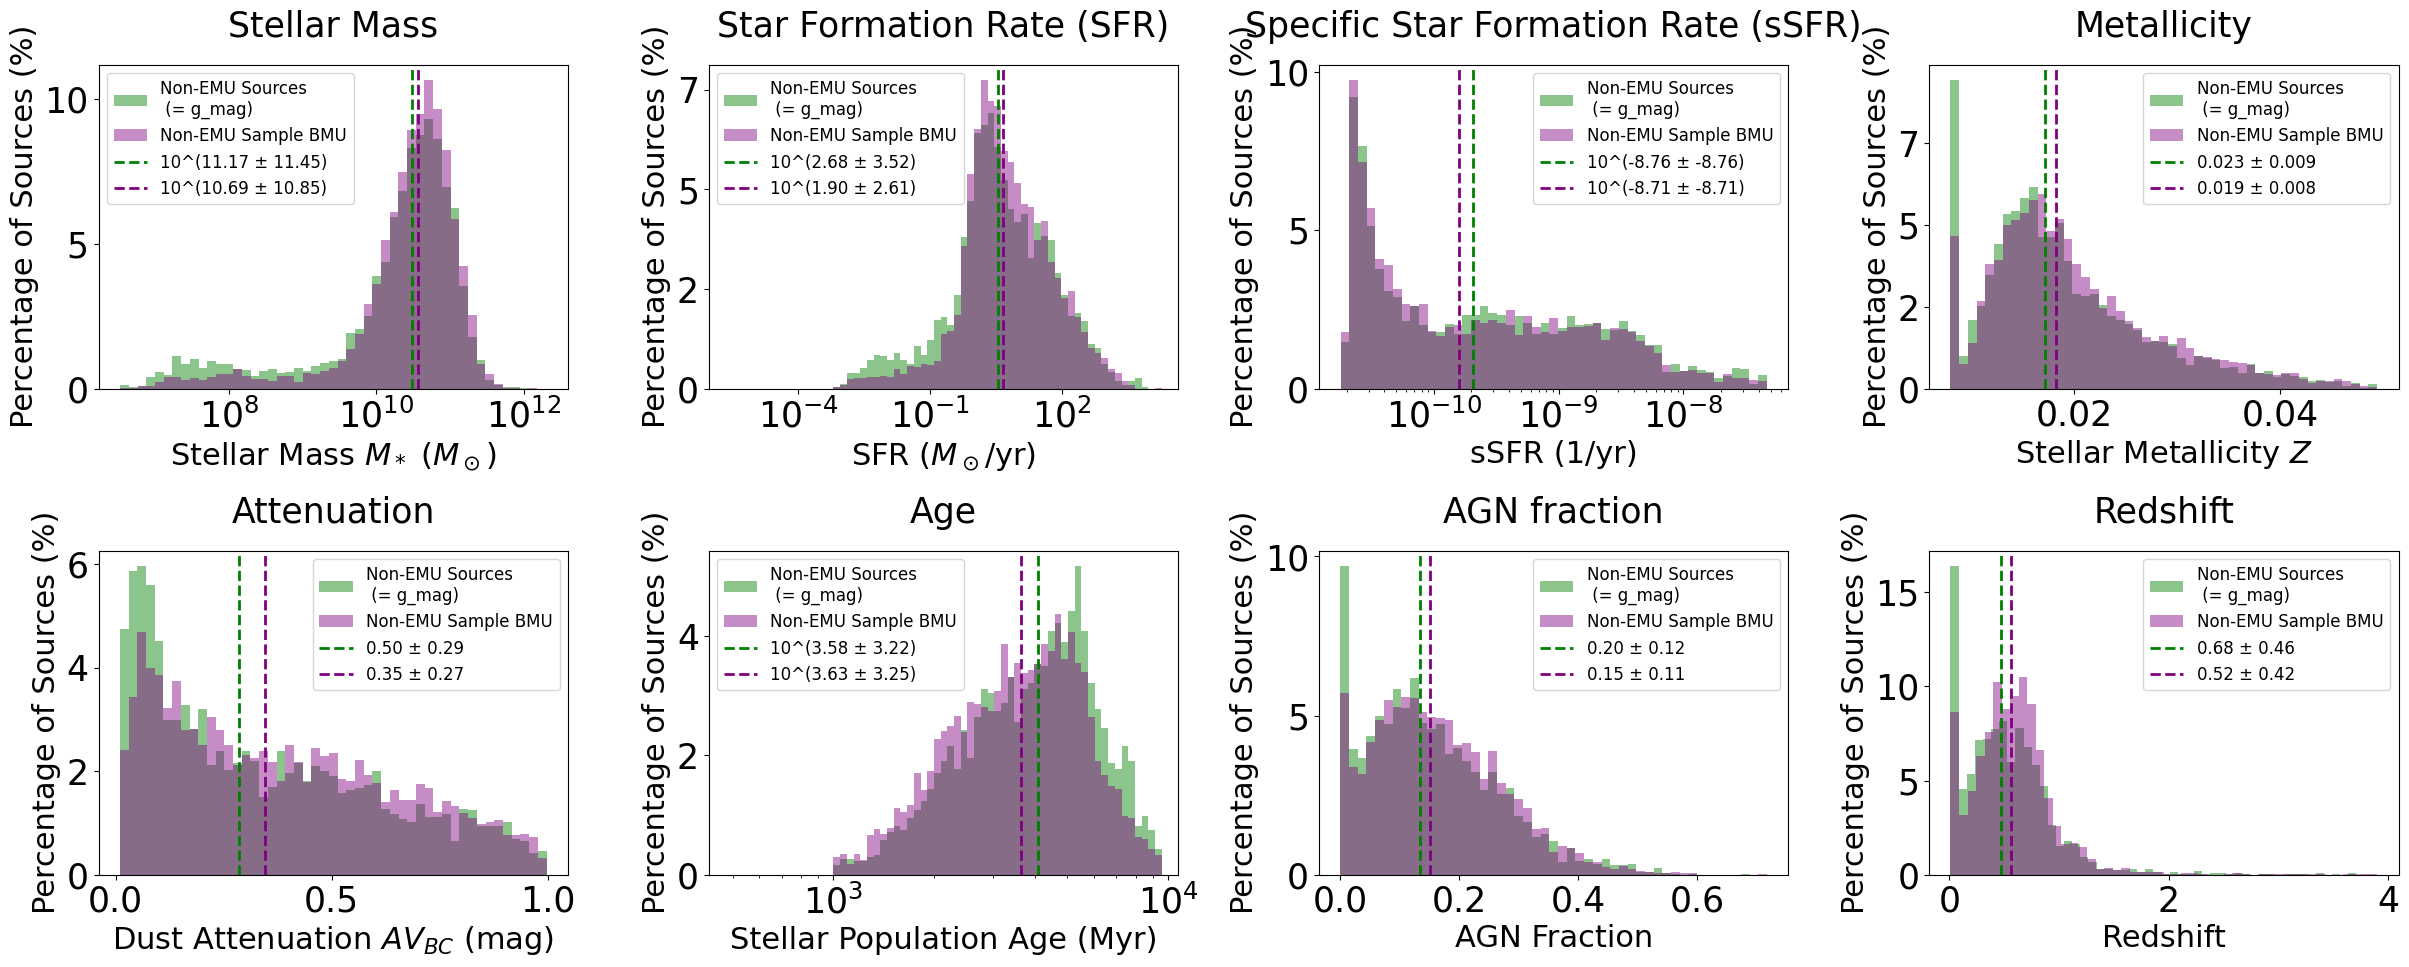

: 

In [ ]:
plot_log_hist_percent_2rows_sns(
    df1=nonemu_sources_best,
    df2=nonemu_samp_prots_best,
    columns=[
        'bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass','bayes.stellar.metallicity',
        'bayes.attenuation.Av_BC', 'bayes.sfh.age', 'bayes.agn.fracAGN', 'bayes.universe.redshift'
    ],
    x_labels=[
        r"Stellar Mass $M_*$ ($M_\odot$)",
        r"SFR ($M_\odot$/yr)",
        r"sSFR (1/yr)",
        r"Stellar Metallicity $Z$",
        r"Dust Attenuation $AV_{BC}$ (mag)",
        r"Stellar Population Age (Myr)",
        r"AGN Fraction",
        r"Redshift"
    ],
    labels=("Non-EMU Sources \n (= g_mag)", "Non-EMU Sample BMU"),
    legend_positions= ['upper left', 'upper left', 'upper right', 'upper right','upper right','upper left','upper right','upper right' ],
    titles = ['Stellar Mass', 'Star Formation Rate (SFR)', 'Specific Star Formation Rate (sSFR)', 'Metallicity', 'Attenuation', 'Age', 'AGN fraction', 'Redshift'],
    values1=[np.log10(emu_avg_stellarmass), np.log10(emu_avg_sfr), np.log10(emu_avg_ssfr), emu_avg_metallicity, emu_avg_Av_BC, np.log10(emu_avg_age), emu_avg_AGN, emu_avg_red],
    errors1=[np.log10(emu_err_stellarmass), np.log10(emu_err_sfr), np.log10(emu_avg_ssfr), emu_err_metallicity, emu_err_Av_BC, np.log10(emu_err_age), emu_err_AGN, emu_err_red],
    values2=[np.log10(nonemu_avg_stellarmass), np.log10(nonemu_avg_sfr), np.log10(nonemu_avg_ssfr), nonemu_avg_metallicity, nonemu_avg_Av_BC, np.log10(nonemu_avg_age), avg_AGN, avg_red],
    errors2=[np.log10(nonemu_err_stellarmass), np.log10(nonemu_err_sfr), np.log10(nonemu_avg_ssfr), nonemu_err_metallicity, nonemu_err_Av_BC, np.log10(nonemu_err_age), err_AGN, err_red],
    color1= 'green',
    color2= 'purple',
    path = '/home/polaris/Lab_Astro/images/nonemu_g_vs_nonemu_best.png'
)

### Density plot of EMU and non-EMU sources

In [ ]:
def plot_log_kde_2rows_sns(
    df1, df2, columns, x_labels, legend_positions, labels, titles, values1, values2, errors1, errors2, 
    figsize=(25, 10),
    title_fontsize=20,
    xlabel_fontsize=20,
    ylabel_fontsize=20,
    xtick_fontsize=15,
    ytick_fontsize=15,
    legend_fontsize=10,
    color1='#3a4dc6',
    color2='#cb3b32',
):
    n = len(columns)
    nrows = 2
    ncols = math.ceil(n / nrows)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, squeeze=False)

    for i, col in enumerate(columns):
        row = i // ncols
        col_idx = i % ncols
        ax = axes[row, col_idx]
        
        data1 = df1[col].dropna()
        data2 = df2[col].dropna()

        if 'bayes.stellar.metallicity' in col:
            # Metallicity specific settings (0.01, 0.02, etc.)
            sns.kdeplot(data1, ax=ax, label=labels[0], color=color1, fill=True, common_norm=False)
            sns.kdeplot(data2, ax=ax, label=labels[1], color=color2, fill=True, common_norm=False)
            
            ticks = np.arange(0, 0.051, 0.01)
            ax.set_xticks(ticks)
            ax.set_xticklabels([f'{x:.2f}' for x in ticks])
            
            ax.axvline(data1.median(), color=color1, linestyle='dashed', linewidth=1.5, 
                      label=f'{values1[i]:.3f} ± {errors1[i]:.3f}')
            ax.axvline(data2.median(), color=color2, linestyle='dashed', linewidth=1.5, 
                      label=f'{values2[i]:.3f} ± {errors2[i]:.3f}')

        elif 'bayes.attenuation.Av_BC' in col:
            # Dust attenuation specific settings (0.0, 0.2, etc.)
            sns.kdeplot(data1, ax=ax, label=labels[0], color=color1, fill=True, common_norm=False)
            sns.kdeplot(data2, ax=ax, label=labels[1], color=color2, fill=True, common_norm=False)
            
            ticks = np.arange(0, 1.1, 0.2)
            ax.set_xticks(ticks)
            ax.set_xticklabels([f'{x:.1f}' for x in ticks])
            
            ax.axvline(data1.median(), color=color1, linestyle='dashed', linewidth=1.5, 
                      label=f'{values1[i]:.2f} ± {errors1[i]:.2f}')
            ax.axvline(data2.median(), color=color2, linestyle='dashed', linewidth=1.5, 
                      label=f'{values2[i]:.2f} ± {errors2[i]:.2f}')

        elif 'bayes.agn.fracAGN' in col:
            # AGN fraction specific settings (0.0, 0.2, etc.)
            sns.kdeplot(data1, ax=ax, label=labels[0], color=color1, fill=True, common_norm=False)
            sns.kdeplot(data2, ax=ax, label=labels[1], color=color2, fill=True, common_norm=False)
            
            ticks = np.arange(0, 0.61, 0.2)
            ax.set_xticks(ticks)
            ax.set_xticklabels([f'{x:.1f}' for x in ticks])
            
            ax.axvline(data1.median(), color=color1, linestyle='dashed', linewidth=1.5, 
                      label=f'{values1[i]:.2f} ± {errors1[i]:.2f}')
            ax.axvline(data2.median(), color=color2, linestyle='dashed', linewidth=1.5, 
                      label=f'{values2[i]:.2f} ± {errors2[i]:.2f}')

        elif 'bayes.universe.redshift' in col:
            # Redshift specific settings (0, 1, 2, etc.)
            sns.kdeplot(data1, ax=ax, label=labels[0], color=color1, fill=True, common_norm=False)
            sns.kdeplot(data2, ax=ax, label=labels[1], color=color2, fill=True, common_norm=False)
            
            ticks = np.arange(0, 5, 1)
            ax.set_xticks(ticks)
            ax.set_xticklabels([f'{int(x)}' for x in ticks])
            
            ax.axvline(data1.median(), color=color1, linestyle='dashed', linewidth=1.5, 
                      label=f'{values1[i]:.1f} ± {errors1[i]:.1f}')
            ax.axvline(data2.median(), color=color2, linestyle='dashed', linewidth=1.5, 
                      label=f'{values2[i]:.1f} ± {errors2[i]:.1f}')

        else:
            # Log-scale plots for other parameters
            data1 = data1[data1 > 0]
            data2 = data2[data2 > 0]
            
            log_data1 = np.log10(data1)
            log_data2 = np.log10(data2)
            sns.kdeplot(log_data1, ax=ax, label=labels[0], color=color1, fill=True, common_norm=False)
            sns.kdeplot(log_data2, ax=ax, label=labels[1], color=color2, fill=True, common_norm=False)
            
            min_log = np.floor(log_data1.min()) if len(log_data1) > 0 else 0
            max_log = np.ceil(log_data2.max()) if len(log_data2) > 0 else 1
            if len(log_data1) > 0 and len(log_data2) > 0:
                min_log = min(np.floor(log_data1.min()), np.floor(log_data2.min()))
                max_log = max(np.ceil(log_data1.max()), np.ceil(log_data2.max()))
            
            if min_log == max_log:
                min_log -= 1
                max_log += 1
            
            exponent_range = max_log - min_log
            if exponent_range <= 10:
                ticks = np.arange(min_log, max_log + 1)
            else:
                step = max(1, exponent_range // 10)
                ticks = np.arange(min_log, max_log + step, step)
            
            ax.set_xticks(ticks)
            
            tick_labels = []
            for x in ticks:
                if x == 0:
                    tick_labels.append('$1$')
                elif x == 1:
                    tick_labels.append('$10$')
                else:
                    tick_labels.append(f'$10^{{{int(x)}}}$')
            
            ax.set_xticklabels(tick_labels)
            ax.set_xlim(min_log, max_log)
            
            if len(data1) > 0:
                ax.axvline(np.log10(data1.median()), color=color1, linestyle='dashed', linewidth=1.5, 
                          label=f'10^{{{values1[i]:.3f}±{errors1[i]:.3f}}}')
            if len(data2) > 0:
                ax.axvline(np.log10(data2.median()), color=color2, linestyle='dashed', linewidth=1.5, 
                          label=f'10^{{{values2[i]:.3f}±{errors2[i]:.3f}}}')

        ax.set_title(titles[i], fontsize=title_fontsize)
        ax.set_xlabel(x_labels[i], fontsize=xlabel_fontsize)
        ax.set_ylabel('Density', fontsize=ylabel_fontsize)
        ax.tick_params(axis='x', labelsize=xtick_fontsize)
        ax.tick_params(axis='y', labelsize=ytick_fontsize)
        ax.legend(loc=legend_positions[i], fontsize=legend_fontsize)

    for j in range(n, nrows * ncols):
        row = j // ncols
        col_idx = j % ncols
        axes[row, col_idx].axis('off')

    plt.tight_layout()
    plt.savefig("/home/polaris/Lab_Astro/cigale_kde.png", dpi=72)
    plt.show()

: 

#### EMU sources vs Non-EMU

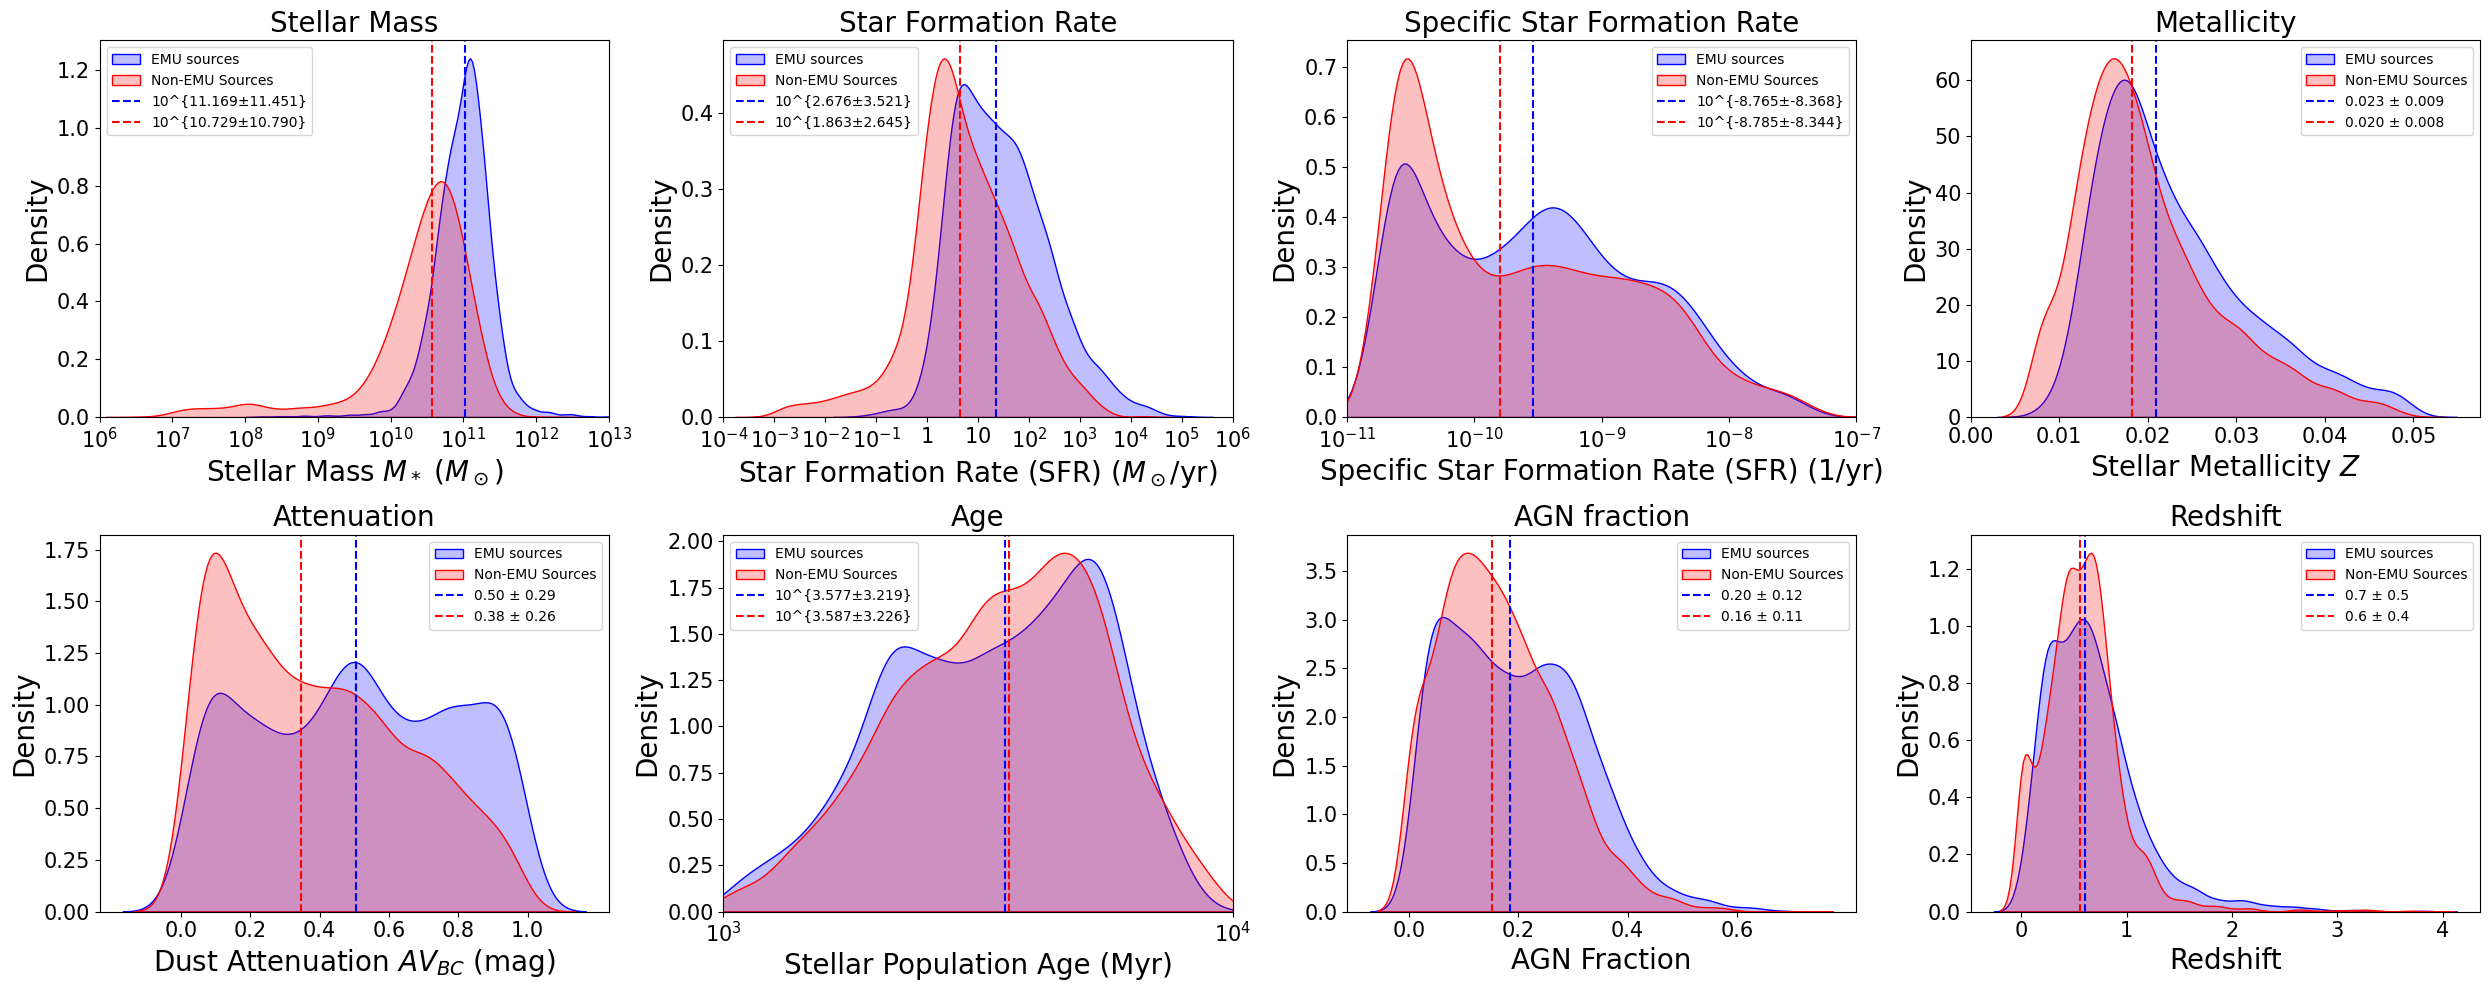

: 

In [ ]:
plot_log_kde_2rows_sns(
    df1=emu_sources_best,
    df2=nonemu_samp_prots_best,
    columns=[
        'bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass','bayes.stellar.metallicity',
        'bayes.attenuation.Av_BC', 'bayes.sfh.age', 'bayes.agn.fracAGN', 'bayes.universe.redshift'
    ],
    x_labels=[
        r"Stellar Mass $M_*$ ($M_\odot$)",
        r"Star Formation Rate (SFR) ($M_\odot$/yr)",
        r"Specific Star Formation Rate (SFR) (1/yr)",
        r"Stellar Metallicity $Z$",
        r"Dust Attenuation $AV_{BC}$ (mag)",
        r"Stellar Population Age (Myr)",
        r"AGN Fraction",
        r"Redshift"
    ],
    labels=("EMU sources", "Non-EMU Sources"),
    legend_positions= ['upper left', 'upper left', 'upper right', 'upper right','upper right','upper left','upper right','upper right' ],
    titles = ['Stellar Mass', 'Star Formation Rate', 'Specific Star Formation Rate', 'Metallicity', 'Attenuation', 'Age', 'AGN fraction', 'Redshift'],
    values1=[np.log10(emu_avg_stellarmass), np.log10(emu_avg_sfr), np.log10(emu_avg_ssfr), emu_avg_metallicity, emu_avg_Av_BC, np.log10(emu_avg_age), emu_avg_AGN, emu_avg_red],
    errors1=[np.log10(emu_err_stellarmass), np.log10(emu_err_sfr), np.log10(emu_err_ssfr), emu_err_metallicity, emu_err_Av_BC, np.log10(emu_err_age), emu_err_AGN, emu_err_red],
    values2=[np.log10(nonemu_samp_prots_stellarmass), np.log10(nonemu_samp_prots_sfr), np.log10(nonemu_samp_prots_ssfr), nonemu_samp_prots_metallicity, nonemu_samp_prots_Av_BC, np.log10(nonemu_samp_prots_age), nonemu_samp_prots_AGN, nonemu_samp_prots_red],
    errors2=[np.log10(nonemu_samp_prots_err_stellarmass), np.log10(nonemu_samp_prots_err_sfr), np.log10(nonemu_samp_prots_err_ssfr), nonemu_samp_prots_err_metallicity, nonemu_samp_prots_err_Av_BC, np.log10(nonemu_samp_prots_err_age), nonemu_samp_prots_err_AGN, nonemu_samp_prots_err_red],
    color1='#0000ff',
    color2='#fb0404'
    # color1='#7B68EE',
    # color2='#DC143C'
)

#### Non-EMU vs Non-EMU (with the same distribution in the g magnitude)

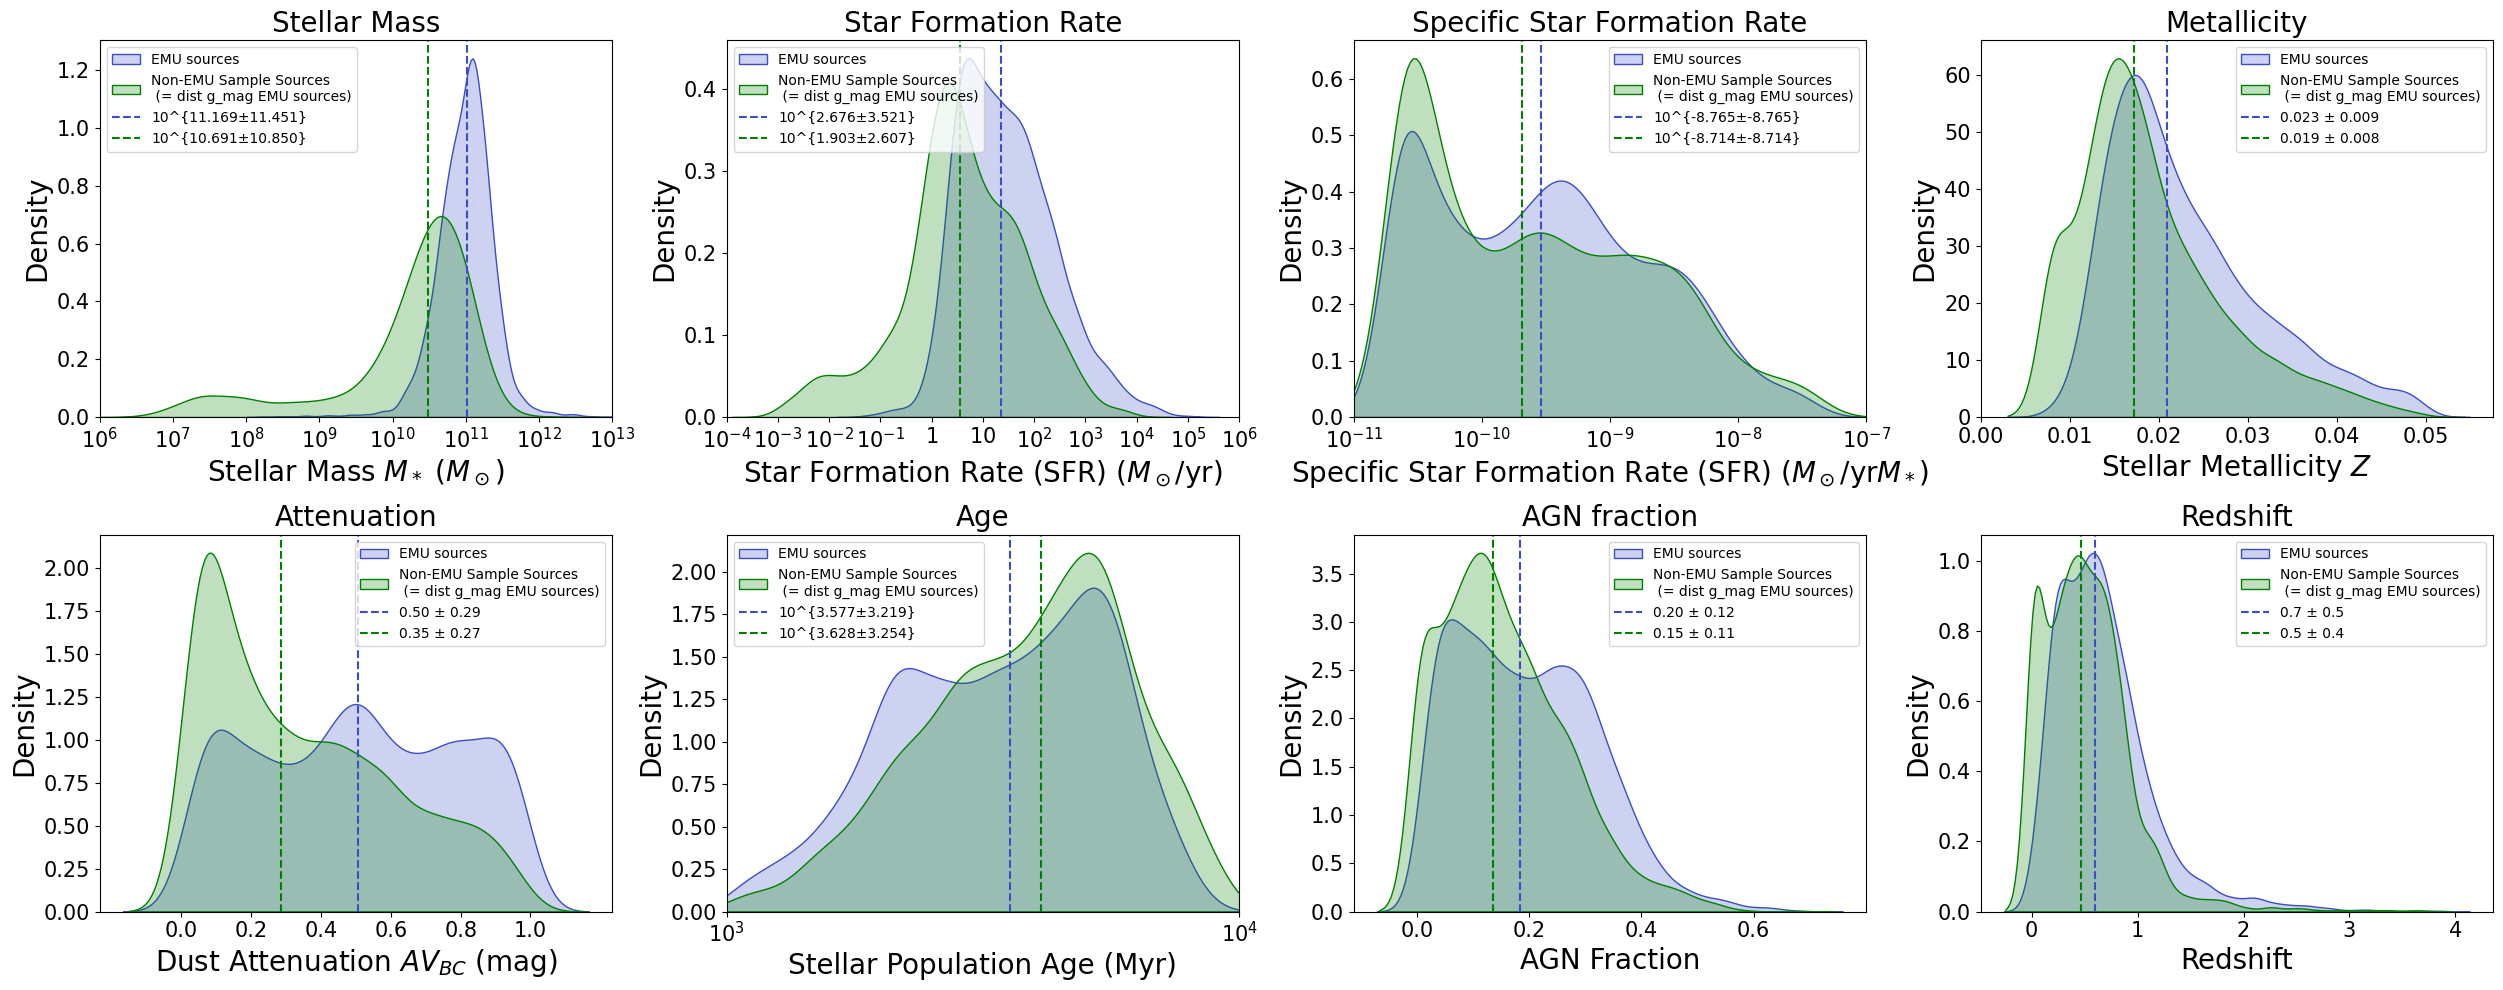

: 

In [ ]:
plot_log_kde_2rows_sns(
    df1=emu_sources_best,
    df2=nonemu_sources_best,
    columns=[
        'bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass','bayes.stellar.metallicity',
        'bayes.attenuation.Av_BC', 'bayes.sfh.age', 'bayes.agn.fracAGN', 'bayes.universe.redshift'
    ],
    x_labels=[
        r"Stellar Mass $M_*$ ($M_\odot$)",
        r"Star Formation Rate (SFR) ($M_\odot$/yr)",
        r"Specific Star Formation Rate (SFR) ($M_\odot$/yr$M_*$)",
        r"Stellar Metallicity $Z$",
        r"Dust Attenuation $AV_{BC}$ (mag)",
        r"Stellar Population Age (Myr)",
        r"AGN Fraction",
        r"Redshift"
    ],
    labels=("EMU sources", "Non-EMU Sample Sources \n (= dist g_mag EMU sources)"),
    legend_positions= ['upper left', 'upper left', 'upper right', 'upper right','upper right','upper left','upper right','upper right' ],
    titles = ['Stellar Mass', 'Star Formation Rate', 'Specific Star Formation Rate', 'Metallicity', 'Attenuation', 'Age', 'AGN fraction', 'Redshift'],
    values1=[np.log10(emu_avg_stellarmass), np.log10(emu_avg_sfr), np.log10(emu_avg_ssfr), emu_avg_metallicity, emu_avg_Av_BC, np.log10(emu_avg_age), emu_avg_AGN, emu_avg_red],
    errors1=[np.log10(emu_err_stellarmass), np.log10(emu_err_sfr), np.log10(emu_avg_ssfr), emu_err_metallicity, emu_err_Av_BC, np.log10(emu_err_age), emu_err_AGN, emu_err_red],
    values2=[np.log10(nonemu_avg_stellarmass), np.log10(nonemu_avg_sfr), np.log10(nonemu_avg_ssfr), nonemu_avg_metallicity, nonemu_avg_Av_BC, np.log10(nonemu_avg_age), avg_AGN, avg_red],
    errors2=[np.log10(nonemu_err_stellarmass), np.log10(nonemu_err_sfr), np.log10(nonemu_avg_ssfr), nonemu_err_metallicity, nonemu_err_Av_BC, np.log10(nonemu_err_age), err_AGN, err_red],
    color2='green'
)

#### Non-EMU sample vs Non-EMU prototypes

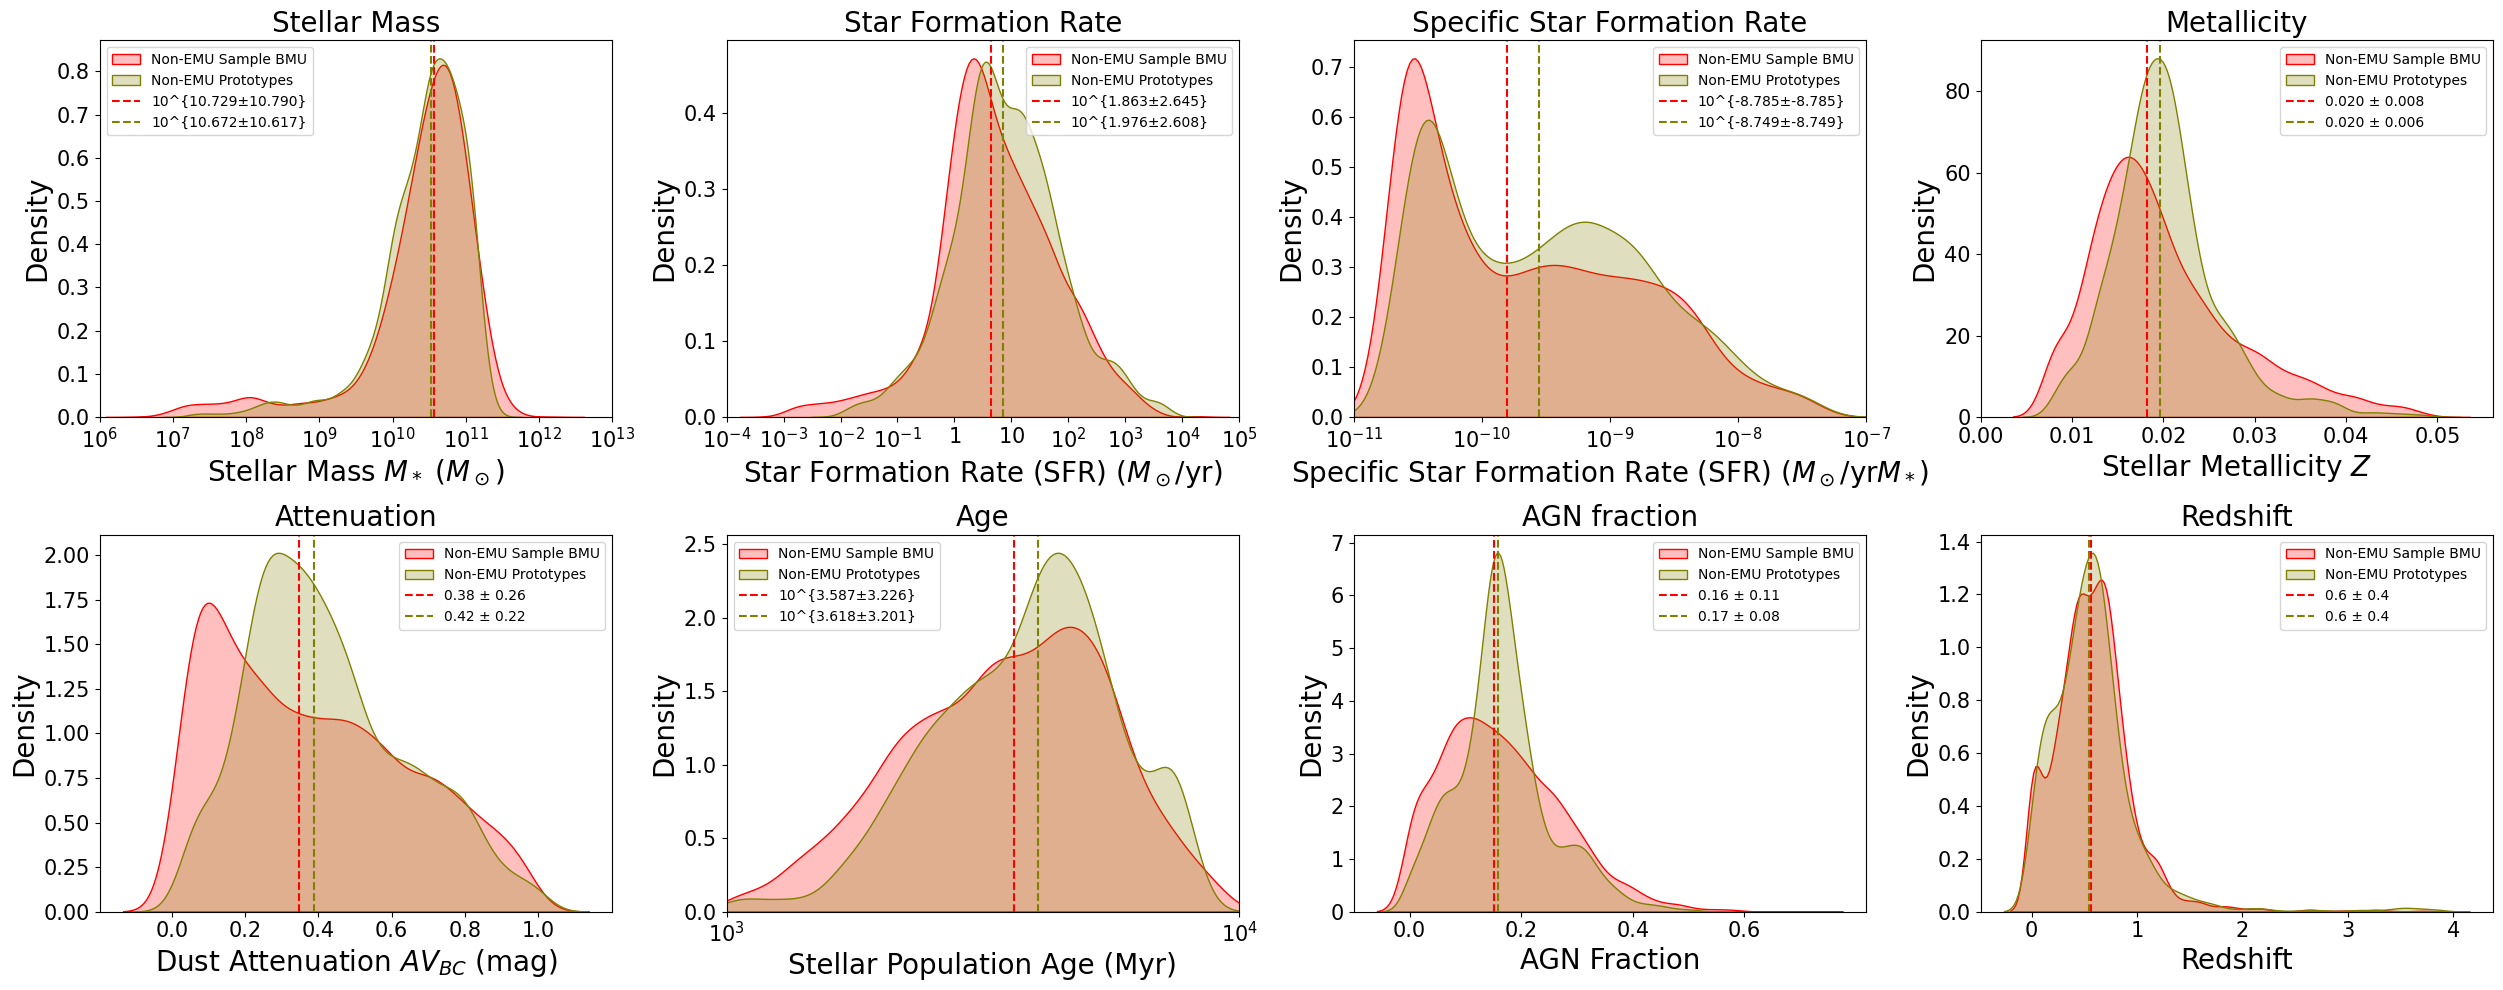

: 

In [ ]:
plot_log_kde_2rows_sns(
    df1=nonemu_samp_prots_best,
    df2=nonemu_prototypes_best,
    columns=[
        'bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass','bayes.stellar.metallicity',
        'bayes.attenuation.Av_BC', 'bayes.sfh.age', 'bayes.agn.fracAGN', 'bayes.universe.redshift'
    ],
    x_labels=[
        r"Stellar Mass $M_*$ ($M_\odot$)",
        r"Star Formation Rate (SFR) ($M_\odot$/yr)",
        r"Specific Star Formation Rate (SFR) ($M_\odot$/yr$M_*$)",
        r"Stellar Metallicity $Z$",
        r"Dust Attenuation $AV_{BC}$ (mag)",
        r"Stellar Population Age (Myr)",
        r"AGN Fraction",
        r"Redshift"
    ],
    labels=("Non-EMU Sample BMU", "Non-EMU Prototypes"),
    legend_positions= ['upper left', 'upper right', 'upper right', 'upper right','upper right','upper left','upper right','upper right' ],
    titles = ['Stellar Mass', 'Star Formation Rate', 'Specific Star Formation Rate', 'Metallicity', 'Attenuation', 'Age', 'AGN fraction', 'Redshift'],
    values1=[np.log10(nonemu_samp_prots_stellarmass), np.log10(nonemu_samp_prots_sfr), np.log10(nonemu_samp_prots_ssfr), nonemu_samp_prots_metallicity, nonemu_samp_prots_Av_BC, np.log10(nonemu_samp_prots_age), nonemu_samp_prots_AGN, nonemu_samp_prots_red],
    errors1=[np.log10(nonemu_samp_prots_err_stellarmass), np.log10(nonemu_samp_prots_err_sfr), np.log10(nonemu_samp_prots_ssfr), nonemu_samp_prots_err_metallicity, nonemu_samp_prots_err_Av_BC, np.log10(nonemu_samp_prots_err_age), nonemu_samp_prots_err_AGN, nonemu_samp_prots_err_red],
    values2=[np.log10(nonemu_prots_stellarmass), np.log10(nonemu_prots_sfr), np.log10(nonemu_prots_ssfr), nonemu_prots_metallicity, nonemu_prots_Av_BC, np.log10(nonemu_prots_age), nonemu_prots_AGN, nonemu_prots_red],
    errors2=[np.log10(nonemu_prots_err_stellarmass), np.log10(nonemu_prots_err_sfr), np.log10(nonemu_prots_ssfr), nonemu_prots_err_metallicity, nonemu_prots_err_Av_BC, np.log10(nonemu_prots_err_age), nonemu_prots_err_AGN, nonemu_prots_err_red],
    color1='red',
    color2='olive'
)

#### Non-EMU vs Non-EMU (with the same distribution in the g magnitude)

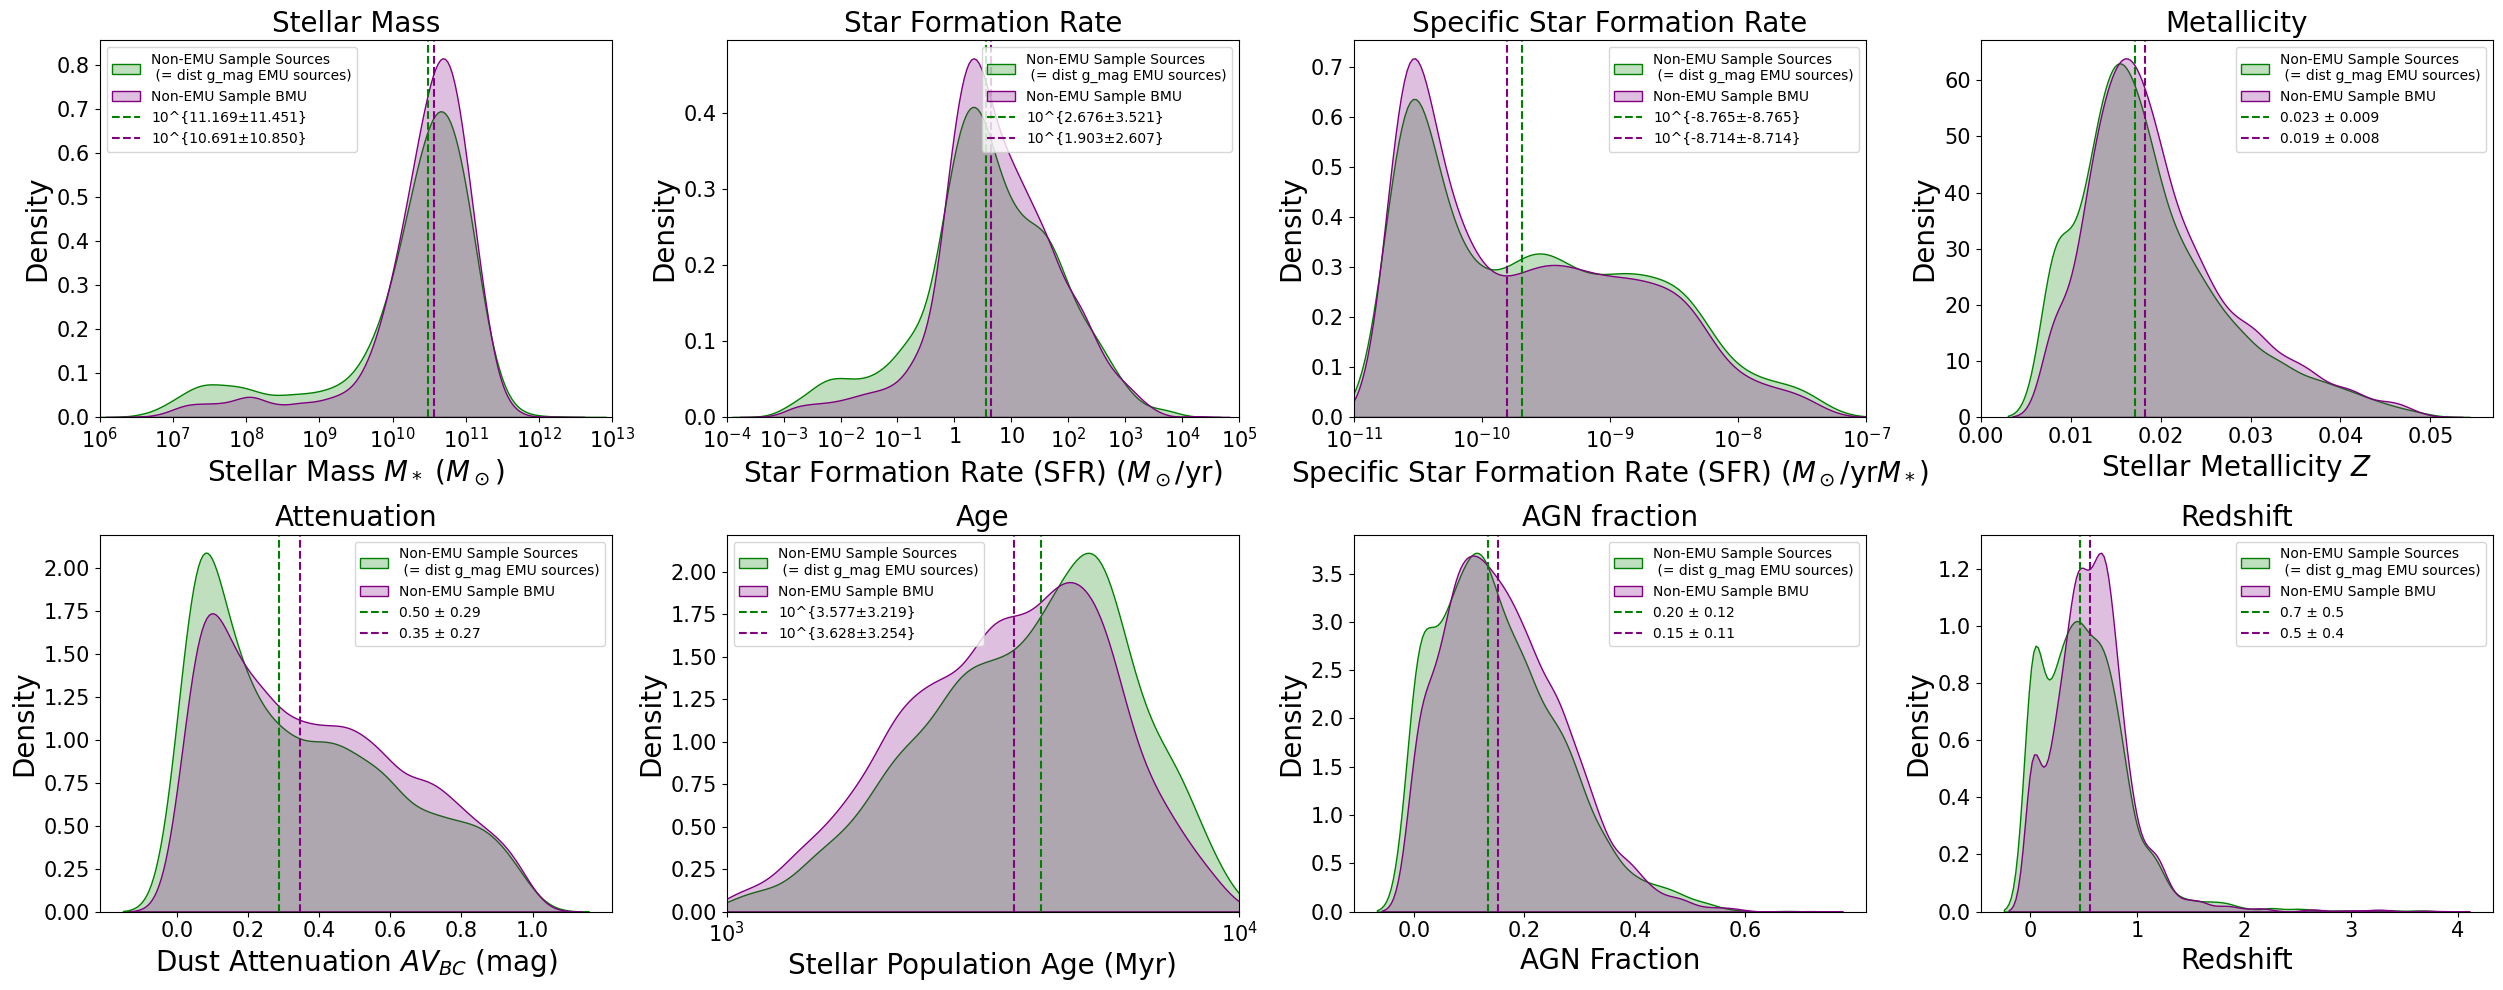

: 

In [ ]:
plot_log_kde_2rows_sns(
    df1=nonemu_sources_best,
    df2=nonemu_samp_prots_best,
    columns=[
        'bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass','bayes.stellar.metallicity',
        'bayes.attenuation.Av_BC', 'bayes.sfh.age', 'bayes.agn.fracAGN', 'bayes.universe.redshift'
    ],
    x_labels=[
        r"Stellar Mass $M_*$ ($M_\odot$)",
        r"Star Formation Rate (SFR) ($M_\odot$/yr)",
        r"Specific Star Formation Rate (SFR) ($M_\odot$/yr$M_*$)",
        r"Stellar Metallicity $Z$",
        r"Dust Attenuation $AV_{BC}$ (mag)",
        r"Stellar Population Age (Myr)",
        r"AGN Fraction",
        r"Redshift"
    ],
    labels=("Non-EMU Sample Sources \n (= dist g_mag EMU sources)", "Non-EMU Sample BMU"),
    legend_positions= ['upper left', 'upper right', 'upper right', 'upper right','upper right','upper left','upper right','upper right' ],
    titles = ['Stellar Mass', 'Star Formation Rate', 'Specific Star Formation Rate', 'Metallicity', 'Attenuation', 'Age', 'AGN fraction', 'Redshift'],
    values1=[np.log10(emu_avg_stellarmass), np.log10(emu_avg_sfr), np.log10(emu_avg_ssfr), emu_avg_metallicity, emu_avg_Av_BC, np.log10(emu_avg_age), emu_avg_AGN, emu_avg_red],
    errors1=[np.log10(emu_err_stellarmass), np.log10(emu_err_sfr), np.log10(emu_avg_ssfr), emu_err_metallicity, emu_err_Av_BC, np.log10(emu_err_age), emu_err_AGN, emu_err_red],
    values2=[np.log10(nonemu_avg_stellarmass), np.log10(nonemu_avg_sfr), np.log10(nonemu_avg_ssfr), nonemu_avg_metallicity, nonemu_avg_Av_BC, np.log10(nonemu_avg_age), avg_AGN, avg_red],
    errors2=[np.log10(nonemu_err_stellarmass), np.log10(nonemu_err_sfr), np.log10(nonemu_avg_ssfr), nonemu_err_metallicity, nonemu_err_Av_BC, np.log10(nonemu_err_age), err_AGN, err_red],
    color1= 'green',
    color2= 'purple'
)

## Star Formation Main Sequence for EMU and Non-EMU sources

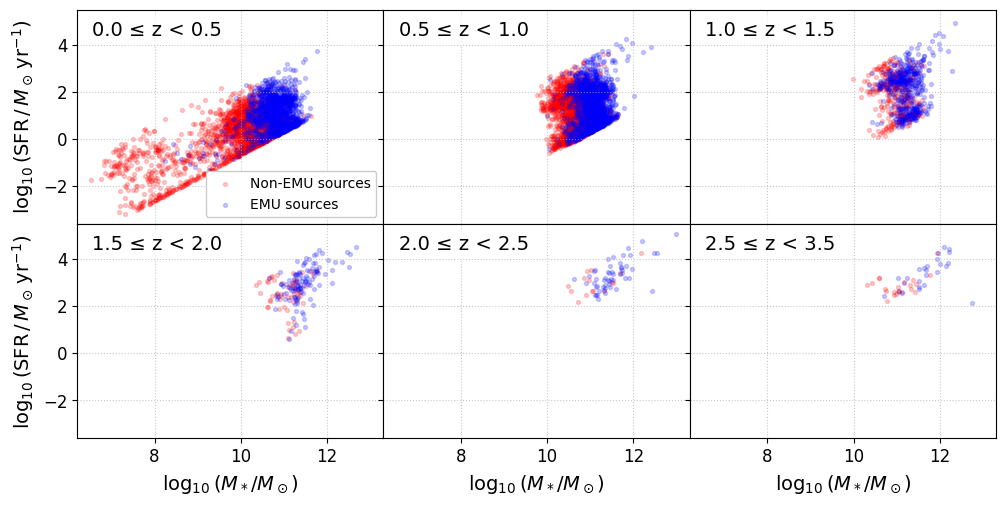

: 

In [ ]:
bins = [(0.0, 0.5), (0.5, 1.0), (1.0, 1.5), (1.5, 2.0), (2.0, 2.5), (2.5, 3.5)]

# Calculate global axis limits
x_min = min(emu_sources_best['log_stellar_mass'].min(), nonemu_samp_prots_best['log_stellar_mass'].min())
x_max = max(emu_sources_best['log_stellar_mass'].max(), nonemu_samp_prots_best['log_stellar_mass'].max())
y_min = min(emu_sources_best['log_sfr'].min(), nonemu_samp_prots_best['log_sfr'].min())
y_max = max(emu_sources_best['log_sfr'].max(), nonemu_samp_prots_best['log_sfr'].max())

# Add padding
x_pad = 0.05 * (x_max - x_min)
y_pad = 0.05 * (y_max - y_min)
xlim = (x_min - x_pad, x_max + x_pad)
ylim = (y_min - y_pad, y_max + y_pad)

# Create figure with perfectly joined edges
fig, axes = plt.subplots(2, 3, figsize=(10, 5), 
                        sharex=True, sharey=True,
                        gridspec_kw={'wspace': 0, 'hspace': 0})

for i, (zmin, zmax) in enumerate(bins):
    ax = axes.flat[i]
    zmask1 = (emu_sources_best['bayes.universe.redshift'] >= zmin) & (emu_sources_best['bayes.universe.redshift'] < zmax)
    zmask2 = (nonemu_samp_prots_best['bayes.universe.redshift'] >= zmin) & (nonemu_samp_prots_best['bayes.universe.redshift'] < zmax)
    subset1 = emu_sources_best[zmask1]
    subset2 = nonemu_samp_prots_best[zmask2]

    # Plot data
    ax.scatter(subset2['log_stellar_mass'], subset2['log_sfr'],
              color='red', s=8, alpha=0.2, label='Non-EMU sources')

    ax.scatter(subset1['log_stellar_mass'], subset1['log_sfr'],
              color='blue', s=8, alpha=0.2, label='EMU sources')
    
    # Add title inside plot
    ax.text(0.05, 0.95, f'{zmin} ≤ z < {zmax}', 
            transform=ax.transAxes,
            ha='left', va='top', fontsize=14,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    ax.grid(True, linestyle=':', alpha=0.7)
    
    # Set axis limits
    ax.set(xlim=xlim, ylim=ylim)
    
    # Add legend to each subplot
    if i == 0:  # Only add legend to first subplot
        ax.legend(fontsize=10, framealpha=1, loc='lower right')

# Configure axis labels
for i, ax in enumerate(axes.flat):
    ax.tick_params(axis='both', which='both', labelsize=12)
    # Only show labels on bottom and left-most plots
    if i >= 3:
        ax.set_xlabel(r'$\log_{10}(M_*/M_\odot)$', fontsize=14, labelpad=5)
    if i % 3 == 0:
        ax.set_ylabel(r'$\log_{10}({\rm SFR}\,/\,M_\odot\,{\rm yr}^{-1})$', fontsize=14, labelpad=5)
    # Remove redundant tick labels
    ax.label_outer()

# Adjust layout to minimize margins
plt.tight_layout(pad=0.5, h_pad=0, w_pad=0)

plt.savefig("/home/polaris/Lab_Astro/relationship_all.png", 
           dpi=100, bbox_inches='tight', facecolor='white')
plt.show()

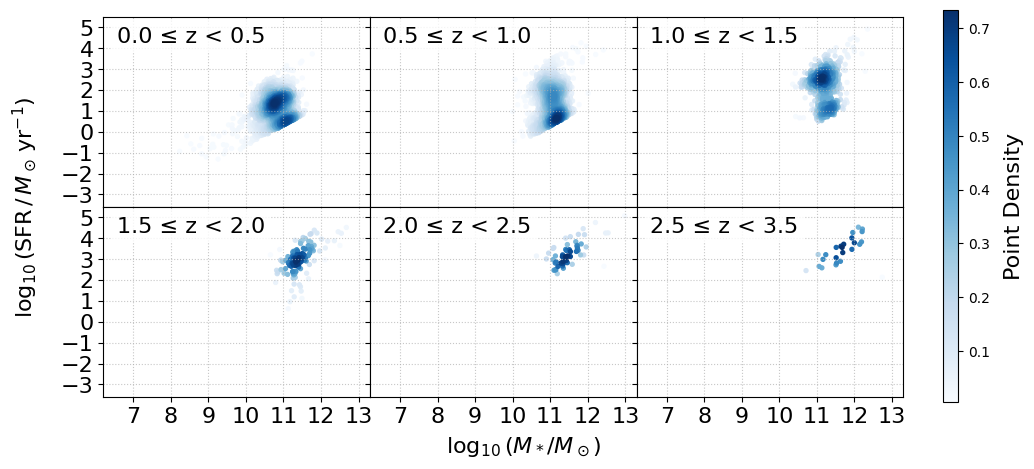

: 

In [ ]:
# Calculate global axis limits
x_min = min(emu_sources_best['log_stellar_mass'].min(), nonemu_samp_prots_best['log_stellar_mass'].min())
x_max = max(emu_sources_best['log_stellar_mass'].max(), nonemu_samp_prots_best['log_stellar_mass'].max())
y_min = min(emu_sources_best['log_sfr'].min(), nonemu_samp_prots_best['log_sfr'].min())
y_max = max(emu_sources_best['log_sfr'].max(), nonemu_samp_prots_best['log_sfr'].max())

# Add padding
x_pad = 0.05 * (x_max - x_min)
y_pad = 0.05 * (y_max - y_min)
xlim = (x_min - x_pad, x_max + x_pad)
ylim = (y_min - y_pad, y_max + y_pad)

# Create figure with adjusted spacing
fig, axes = plt.subplots(2, 3, figsize=(10, 5),  # Slightly larger figure
                        sharex=True, sharey=True,
                        gridspec_kw={'wspace': 0, 'hspace': 0})

# Initialize variables for colorbar scaling
all_z_values = []

for i, (zmin, zmax) in enumerate(bins):
    ax = axes.flat[i]
    zmask1 = (emu_sources_best['bayes.universe.redshift'] >= zmin) & (emu_sources_best['bayes.universe.redshift'] < zmax)
    subset1 = emu_sources_best[zmask1]

    # Calculate the point density for EMU sources
    x1 = subset1['log_stellar_mass'].values
    y1 = subset1['log_sfr'].values
    xy1 = np.vstack([x1, y1])
    z1 = gaussian_kde(xy1)(xy1)
    
    all_z_values.extend(z1)
    
    idx1 = z1.argsort()
    x1, y1, z1 = x1[idx1], y1[idx1], z1[idx1]
    
    sc = ax.scatter(x1, y1, c=z1, s=8, cmap='Blues')
    
    # Add title inside plot
    ax.text(0.05, 0.95, f'{zmin} ≤ z < {zmax}', 
            transform=ax.transAxes,
            ha='left', va='top', fontsize=16,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.set(xlim=xlim, ylim=ylim)

    ax.set_xticks([7, 8, 9, 10, 11, 12, 13])
    ax.set_yticks([-3.0,-2.0,-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0 ]) 

    ax.tick_params(axis='both', which='major', labelsize=16)  # Adjust major tick size
    ax.tick_params(axis='both', which='minor', labelsize=16)  # Adjust minor tick size

# Configure axis labels with adjusted positions
fig.text(0.5, 0.02, r'$\log_{10}(M_*/M_\odot)$', 
         ha='center', va='center', fontsize=16)
fig.text(0.001, 0.5, r'$\log_{10}({\rm SFR}\,/\,M_\odot\,{\rm yr}^{-1})$', 
         ha='center', va='center', rotation='vertical', fontsize=16)

# Remove redundant tick labels
for ax in axes.flat:
    ax.label_outer()

# Create colorbar with better positioning and size
# Get position of the last subplot
last_ax = axes[-1, -1]
pos = last_ax.get_position()

# Create colorbar axes closer to the plots
cax = fig.add_axes([pos.x1 + 0.02,  # Closer to the plot
                   pos.y0, 
                   0.015,           # Wider than before
                   pos.height+0.4])

sm = ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=np.min(all_z_values), 
                                                    vmax=np.percentile(all_z_values, 95)))
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Point Density', fontsize=16, labelpad=10)  # Added labelpad

# Adjust layout to accommodate the colorbar
plt.subplots_adjust(left=0.08,   # More space for y-label
                   right=0.88,  # Space for colorbar
                   bottom=0.12) # Space for x-label

plt.savefig("/home/polaris/Lab_Astro/sfr_mass_emu.png", 
           dpi=100, bbox_inches='tight', facecolor='white')
plt.show()

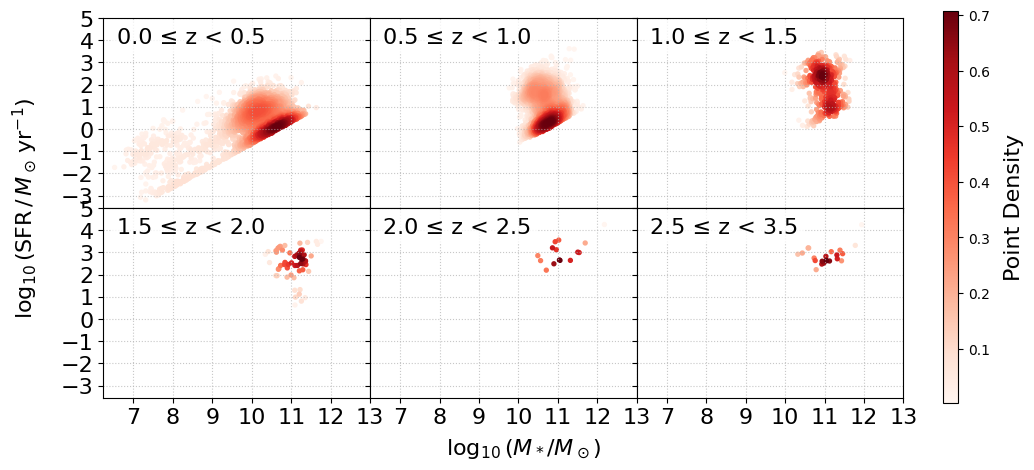

: 

In [ ]:
# Calculate global axis limits
x_min = min(nonemu_samp_prots_best['log_stellar_mass'].min(), nonemu_samp_prots_best['log_stellar_mass'].min())
x_max = max(nonemu_samp_prots_best['log_stellar_mass'].max(), nonemu_samp_prots_best['log_stellar_mass'].max())
y_min = min(nonemu_samp_prots_best['log_sfr'].min(), nonemu_samp_prots_best['log_sfr'].min())
y_max = max(nonemu_samp_prots_best['log_sfr'].max(), nonemu_samp_prots_best['log_sfr'].max())

# Add padding
x_pad = 0.05 * (x_max - x_min)
y_pad = 0.05 * (y_max - y_min)
xlim = (x_min - x_pad, x_max + x_pad)
ylim = (y_min - y_pad, y_max + y_pad)

# Create figure with adjusted spacing
fig, axes = plt.subplots(2, 3, figsize=(10, 5),  # Slightly larger figure
                        sharex=True, sharey=True,
                        gridspec_kw={'wspace': 0, 'hspace': 0})

# Initialize variables for colorbar scaling
all_z_values = []

for i, (zmin, zmax) in enumerate(bins):
    ax = axes.flat[i]
    zmask1 = (nonemu_samp_prots_best['bayes.universe.redshift'] >= zmin) & (nonemu_samp_prots_best['bayes.universe.redshift'] < zmax)
    subset1 = nonemu_samp_prots_best[zmask1]

    # Calculate the point density for EMU sources
    x1 = subset1['log_stellar_mass'].values
    y1 = subset1['log_sfr'].values
    xy1 = np.vstack([x1, y1])
    z1 = gaussian_kde(xy1)(xy1)
    
    all_z_values.extend(z1)
    
    idx1 = z1.argsort()
    x1, y1, z1 = x1[idx1], y1[idx1], z1[idx1]
    
    sc = ax.scatter(x1, y1, c=z1, s=8, cmap='Reds')
    
    # Add title inside plot
    ax.text(0.05, 0.95, f'{zmin} ≤ z < {zmax}', 
            transform=ax.transAxes,
            ha='left', va='top', fontsize=16,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.set(xlim=xlim, ylim=ylim)

    ax.set_xticks([7, 8, 9, 10, 11, 12, 13])
    ax.set_yticks([-3.0,-2.0,-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0 ]) 

    ax.tick_params(axis='both', which='major', labelsize=16)  # Adjust major tick size
    ax.tick_params(axis='both', which='minor', labelsize=16)  # Adjust minor tick size

# Configure axis labels with adjusted positions
fig.text(0.5, 0.02, r'$\log_{10}(M_*/M_\odot)$', 
         ha='center', va='center', fontsize=16)
fig.text(0.001, 0.5, r'$\log_{10}({\rm SFR}\,/\,M_\odot\,{\rm yr}^{-1})$', 
         ha='center', va='center', rotation='vertical', fontsize=16)

# Remove redundant tick labels
for ax in axes.flat:
    ax.label_outer()

# Create colorbar with better positioning and size
# Get position of the last subplot
last_ax = axes[-1, -1]
pos = last_ax.get_position()

# Create colorbar axes closer to the plots
cax = fig.add_axes([pos.x1 + 0.02,  # Closer to the plot
                   pos.y0, 
                   0.015,           # Wider than before
                   pos.height+0.4])

sm = ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=np.min(all_z_values), 
                                                    vmax=np.percentile(all_z_values, 95)))
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Point Density', fontsize=16, labelpad=10)  # Added labelpad

# Adjust layout to accommodate the colorbar
plt.subplots_adjust(left=0.08,   # More space for y-label
                   right=0.88,  # Space for colorbar
                   bottom=0.12) # Space for x-label

plt.savefig("/home/polaris/Lab_Astro/sfr_mass_nonemu.png", 
           dpi=100, bbox_inches='tight', facecolor='white')
plt.show()

## Specific star formation rate vs stellar mass

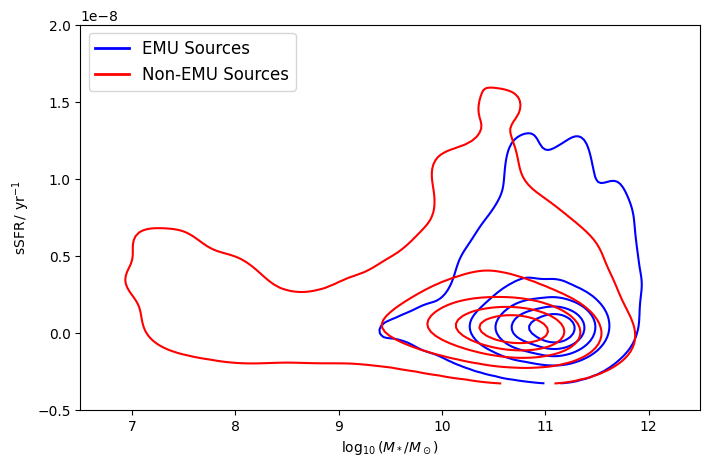

: 

In [ ]:


plt.figure(figsize=(8, 5))
sns.kdeplot(data=emu_sources_best, x='log_stellar_mass', y='bayes.sfh.sfr_permass', color='blue',levels=6, fill=False, label='EMU')
sns.kdeplot(data=nonemu_samp_prots_best, x='log_stellar_mass',y='bayes.sfh.sfr_permass',  color='red',levels=6, fill=False, label='Non-EMU')

legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='EMU Sources'),
    Line2D([0], [0], color='red', lw=2, label='Non-EMU Sources')
]

#plt.title('KDE Plot Comparison (No Fill)')
plt.xlabel(r'$\log_{10}(M_*/M_\odot)$')
plt.ylabel(r'${\rm sSFR}\,/\,\,{\rm yr}^{-1}$')
plt.ylim(-0.5*1e-8, 2*1e-8)
plt.xlim(6.5, 12.5)
plt.legend(handles=legend_elements, fontsize=12, frameon=True, framealpha=0.8, loc='upper left')
plt.show()

## Upper limits of radio for non-EMU sources

In [7]:

# CONVERT EMU 943 MHz FLUX to 1.4 GHz LUMINOSITY
redshift = emu_sources_best['bayes.universe.redshift'].values
flux_943MHz = emu_sources_best['EMU_flux_int'].values * u.mJy  # flux is in milliJansky according to the catalog

alpha = -0.7  

# Luminosity distance, Mpc to meters
luminosity_distance = cosmo.luminosity_distance(redshift).to(u.m)

# Convert flux from mJy to W m^-2 Hz^-1
flux_943MHz_SI = flux_943MHz.to(u.W * u.m**-2 * u.Hz**-1) 

# 1.4 GHz luminosity using formula from 
# 'Probing the timescale of the 1.4 GHz radio emissions as a star formation tracer' R. C. Arango-Toro, et al. 2023
# L_1.4 = 4πD_L^2 × (1.4/0.943)^α × F_0.943 / (1 + z)^(1 + α)
luminosity_1_4GHz = (
    4 * np.pi * luminosity_distance**2 * 
    (1.4 / 0.943)**alpha *  # (1.4 / 0.943)^α
    flux_943MHz_SI / 
    (1 + redshift)**(1+alpha)  # (1 + z)^(1 + α)
)

# 943MHz luminosity
luminosity_943MHz = (
    4 * np.pi * luminosity_distance**2 * 
    flux_943MHz_SI / 
    (1 + redshift)**(1+alpha)  # (1 + z)^(1 + α)
)

log_luminosity_943MHz = pd.Series(np.log10(luminosity_943MHz.value))

# The result from the formula is in W Hz^-1
# Convert to log10 of (erg s^-1 Hz^-1)
log_luminosity_1_4GHz_obs_watt = pd.Series(np.log10(luminosity_1_4GHz.value))
log_luminosity_1_4GHz_obs = pd.Series(np.log10(luminosity_1_4GHz.to(u.erg / (u.s * u.Hz)).value))

###########################################################################################################

# CONVERT CIGALE SFR TO 1.4 GHz LUMINOSITY
# Asssuming that the SFR of CIGALE is the same at 1.4 GHz
# 'CALIBRATING EXTINCTION-FREE STAR FORMATION RATE DIAGNOSTICS WITH 33 GHz FREE–FREE EMISSION IN NGC 6946', E. J. Murphy 2011
# This formula return the luminosity in erg s^-1 Hz^-1
log_luminosity_1_4GHz_theor_watt = np.log10((emu_sources_best['bayes.sfh.sfr'] / 6.35e-29)) -7
log_luminosity_1_4GHz_theor = np.log10((emu_sources_best['bayes.sfh.sfr'] / 6.35e-29))



In [8]:
 # CONVERT EMU 943 MHz MINIMUM DETECTED FLUX at REDSHIFT 0 to 1.4 GHz LUMINOSITY
def calculate_radio_upper_limit(redshift):
    emu_sensitivity_mJy = 50*  u.microjansky

    # Convert flux from mJy to W m^-2 Hz^-1
    emu_sensitivity_Whz = emu_sensitivity_mJy.to(u.W * u.m**-2 * u.Hz**-1) 

    alpha = -0.7  

    # Luminosity distance, Mpc to meters
    luminosity_distance = cosmo.luminosity_distance(redshift).to(u.m)


    # 1.4 GHz luminosity using formula from 
    # 'Probing the timescale of the 1.4 GHz radio emissions as a star formation tracer' R. C. Arango-Toro, et al. 2023
    # L_1.4 = 4πD_L^2 × (1.4/0.943)^α × F_0.943 / (1 + z)^(1 + α)
    luminosity_1_4GHz = (
        4 * np.pi * luminosity_distance**2 * 
        (1.4 / 0.943)**alpha *  # (1.4 / 0.943)^α
        emu_sensitivity_Whz / 
        (1 + redshift)**(1+alpha)  # (1 + z)^(1 + α)
    )


    return luminosity_1_4GHz.value


In [ ]:
radio_upper_limit_watt = np.log10(calculate_radio_upper_limit(nonemu_samp_prots_best['bayes.universe.redshift'].values))
nonemu_log_luminosity_1_4GHz_theor_watt = np.log10((nonemu_samp_prots_best['bayes.sfh.sfr'] / 6.35e-29))-7

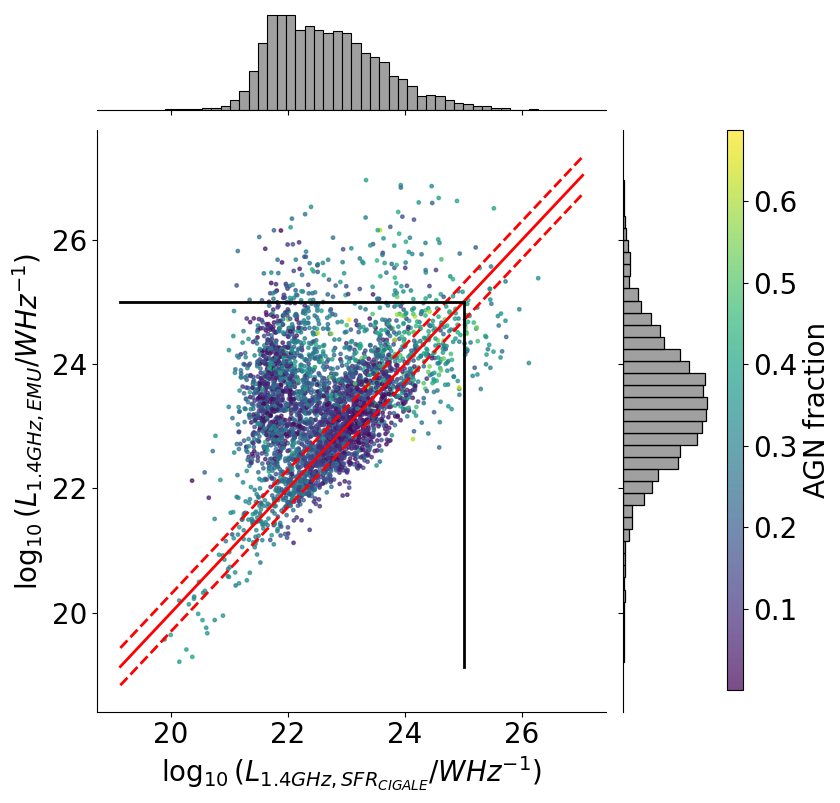

In [ ]:
g = sns.JointGrid(
    data=emu_sources_best,
    x=log_luminosity_1_4GHz_theor_watt,
    y=log_luminosity_1_4GHz_obs_watt,
    height=8
)

points = g.ax_joint.scatter(
    log_luminosity_1_4GHz_theor_watt,
    log_luminosity_1_4GHz_obs_watt,
    c=emu_sources_best['bayes.agn.fracAGN'],
    cmap='viridis',
    alpha=0.7,
    s=6
)

# nonemu_points = g.ax_joint.scatter(
#     x=nonemu_log_luminosity_1_4GHz_theor_watt,
#     y=radio_upper_limit_watt,
#     color = 'black',
#     s=1
# )

all_luminosity_values = pd.concat([log_luminosity_1_4GHz_theor_watt, log_luminosity_1_4GHz_obs_watt]).dropna()

min_val = all_luminosity_values.min()
max_val = all_luminosity_values.max()

buffer = (max_val - min_val) * 0.01 
common_lim_min = min_val - buffer
common_lim_max = max_val + buffer

# 1:1 and error lines
line_coords = np.linspace(common_lim_min, common_lim_max, 100)
g.ax_joint.plot(line_coords, line_coords, color='red', linestyle='-', linewidth=2, label='1:1 line')
g.ax_joint.plot(line_coords, line_coords+0.3, color='red', linestyle='--', linewidth=2, label='error')
g.ax_joint.plot(line_coords, line_coords-0.3, color='red', linestyle='--', linewidth=2, label='error')

# AGN line in vertical and horizontal directions
g.ax_joint.plot([common_lim_min, 25], [25, 25], color='black', linestyle='-', linewidth=2, label='AGN')
g.ax_joint.plot([25, 25], [common_lim_min, 25], color='black', linestyle='-', linewidth=2, label='AGN')

# AHistograms
sns.histplot(
    data=emu_sources_best,
    x=log_luminosity_1_4GHz_theor_watt,
    bins=40,
    ax=g.ax_marg_x,
    color='grey',
    edgecolor='black'
)
sns.histplot(
    data=emu_sources_best,
    y=log_luminosity_1_4GHz_obs_watt,
    bins=40,
    ax=g.ax_marg_y,
    color='grey',
    edgecolor='black'
)

g.set_axis_labels(
    r'$\log_{10}(L_{1.4 GHz, SFR_{CIGALE}}/ W Hz^{-1})$',
    r'$\log_{10}(L_{1.4 GHz, EMU}/ W Hz^{-1})$',
    fontsize=20
)
g.ax_joint.tick_params(axis='both', labelsize=20)
g.ax_marg_x.tick_params(labelsize=20)
g.ax_marg_y.tick_params(labelsize=20)


#g.fig.suptitle(r'$L_{1.4 GHz, SFR_{CIGALE}}$ vs $L_{1.4 GHz, EMU}$ (colored by AGN fraction)', fontsize=20,  y=1.0)
g.fig.subplots_adjust(top=0.95, right=0.85) 


cbar_ax = g.fig.add_axes([0.87, 0.1, 0.02, 0.7])
cbar = g.fig.colorbar(points, cax=cbar_ax)
cbar.set_label('AGN fraction', fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.savefig("/home/polaris/Lab_Astro/images/radioplot_upps_other.png", dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
print('Number of objects with observed luminosity > 25 W/Hz:', np.sum(log_luminosity_1_4GHz_obs_watt >= 25))

obs = log_luminosity_1_4GHz_obs_watt.reset_index(drop=True)
theor = log_luminosity_1_4GHz_theor_watt.reset_index(drop=True)

agn_candidates = np.sum(
    (obs <= 25) &
    (obs >= theor + 0.3)
)

sfr_correct = np.sum(
    (obs >= theor - 0.3) &
    (obs <= theor + 0.3)
)

print('Number of AGN candidates (Radio emission bigger than expected from SFR):', 
      agn_candidates)
print('Number of SFR correct objects (Radio emission within 0.3 dex of SFR):', 
      sfr_correct)

Number of objects with observed luminosity > 25 W/Hz: 166
Number of objects with CIGALE derived luminosity >25WHz-1: 9
Number of AGN candidates (Radio emission bigger than expected from SFR): 2182
Number of SFR correct objects (Radio emission within 0.3 dex of SFR): 991


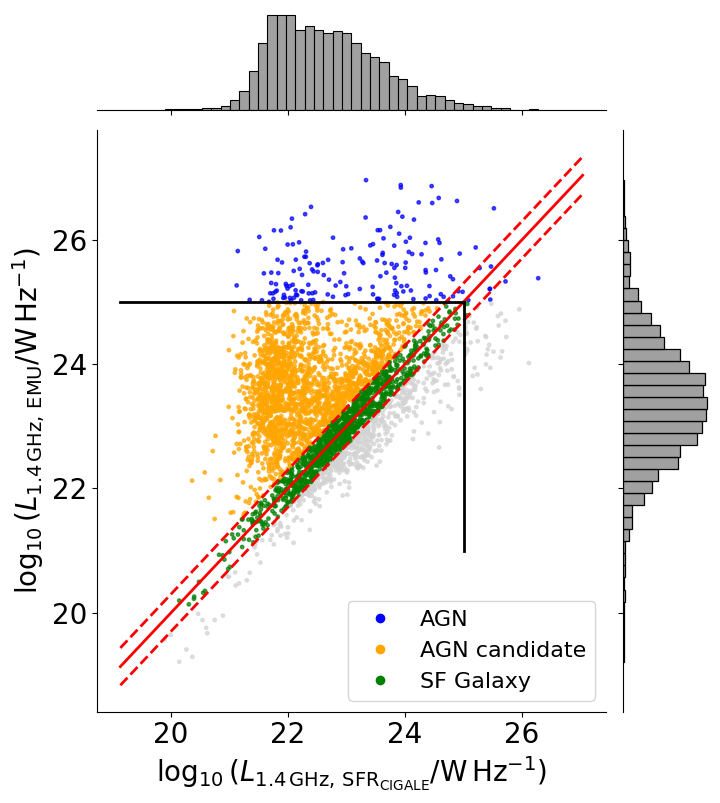

In [ ]:
classification = pd.Series('Other', index=obs.index)

classification[obs >= 25] = 'AGN'
classification[(obs >= theor + 0.3) & (obs <= 25)] = 'AGN candidate'
classification[(np.abs(obs - theor) <= 0.3) & (obs < 25)] = 'SFR'

emu_sources_best = emu_sources_best.reset_index(drop=True)
emu_sources_best['classification'] = classification

category_colors = {
    'AGN': 'blue',
    'AGN candidate': 'orange',
    'SFR': 'green',
    'Other': 'lightgrey'
}
point_colors = emu_sources_best['classification'].map(category_colors)


g = sns.JointGrid(
    data=emu_sources_best,
    x=log_luminosity_1_4GHz_theor_watt,
    y=log_luminosity_1_4GHz_obs_watt,
    height=8
)

# Scatter plot
g.ax_joint.scatter(
    log_luminosity_1_4GHz_theor_watt,
    log_luminosity_1_4GHz_obs_watt,
    c=point_colors,
    alpha=0.7,
    s=6
)

# Plot limits
all_vals = pd.concat([log_luminosity_1_4GHz_theor_watt, log_luminosity_1_4GHz_obs_watt]).dropna()
min_val = all_vals.min()
max_val = all_vals.max()
buffer = (max_val - min_val) * 0.01
common_min = min_val - buffer
common_max = max_val + buffer
line_coords = np.linspace(common_min, common_max, 100)

# 1:1 and ±0.3 dex lines
g.ax_joint.plot(line_coords, line_coords, color='red', linestyle='-', linewidth=2, label='1:1 line')
g.ax_joint.plot(line_coords, line_coords + 0.3, color='red', linestyle='--', linewidth=2, label='±0.3 dex')
g.ax_joint.plot(line_coords, line_coords - 0.3, color='red', linestyle='--', linewidth=2)

# AGN threshold lines
g.ax_joint.plot([common_min, 25], [25, 25], color='black', linestyle='-', linewidth=2, label='AGN threshold')
g.ax_joint.plot([25, 25], [21, 25], color='black', linestyle='-', linewidth=2)

# Histograms
sns.histplot(
    data=emu_sources_best,
    x=log_luminosity_1_4GHz_theor_watt,
    bins=40,
    ax=g.ax_marg_x,
    color='grey',
    edgecolor='black'
)
sns.histplot(
    data=emu_sources_best,
    y=log_luminosity_1_4GHz_obs_watt,
    bins=40,
    ax=g.ax_marg_y,
    color='grey',
    edgecolor='black'
)

# Axis labels and ticks
g.set_axis_labels(
    r'$\log_{10}(L_{1.4 \, \mathrm{GHz}, \, \mathrm{SFR}_{\mathrm{CIGALE}}}/ \mathrm{W \, Hz}^{-1})$',
    r'$\log_{10}(L_{1.4 \, \mathrm{GHz}, \, \mathrm{EMU}}/ \mathrm{W \, Hz}^{-1})$',
    fontsize=20
)
g.ax_joint.tick_params(axis='both', labelsize=20)
g.ax_marg_x.tick_params(labelsize=20)
g.ax_marg_y.tick_params(labelsize=20)

g.fig.subplots_adjust(top=0.95, right=0.85)

# Custom legend (excluding 'Other')
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='AGN', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='AGN candidate', markerfacecolor='orange', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='SF Galaxy', markerfacecolor='green', markersize=8),
]
g.ax_joint.legend(handles=legend_elements, fontsize=16, loc='lower right')

plt.savefig("/home/polaris/Lab_Astro/images/radioplot_final_three_classes.png", dpi=100, bbox_inches='tight')
plt.show()


## Evolution of properties over redshift

In [ ]:
def plot_properties_evolution(
    df, columns, y_labels, titles, path,
    figsize=(25, 10),
    title_fontsize=25,
    xlabel_fontsize=22,
    ylabel_fontsize=22,
    xtick_fontsize=25,
    ytick_fontsize=25,
    legend_fontsize=12,
    cmap='viridis',
    gridsize=50,
):
    log_cols = ['bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass', 'bayes.sfh.age']

    n = len(columns)
    nrows = 2
    ncols = math.ceil(n / nrows)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, squeeze=False)

    for i, col in enumerate(columns):
        row = i // ncols
        col_idx = i % ncols
        ax = axes[row, col_idx]

        y = df[col].copy()
        x = df['bayes.universe.redshift']

        if col in log_cols:
            y = np.log10(y)

        hb = ax.hexbin(x, y, gridsize=gridsize, cmap=cmap, mincnt=1)
        cb = fig.colorbar(hb, ax=ax)
        cb.set_label('Number of sources')

        ax.set_xlabel("Lookback time (Gyr)", fontsize=xlabel_fontsize)
        ax.set_ylabel(y_labels[i], fontsize=ylabel_fontsize)
        ax.tick_params(axis='x', labelsize=xtick_fontsize)
        ax.tick_params(axis='y', labelsize=ytick_fontsize)
        ax.set_title(titles[i], fontsize=title_fontsize, pad=20)

    # Turn off unused subplots
    for j in range(n, nrows * ncols):
        row = j // ncols
        col_idx = j % ncols
        axes[row, col_idx].axis('off')

    fig.subplots_adjust(
        left=0.05,
        right=0.97,
        top=0.90,
        bottom=0.09,
        wspace=0.40,
        hspace=0.50
    )
    plt.savefig(path, dpi=200)
    plt.show()

: 

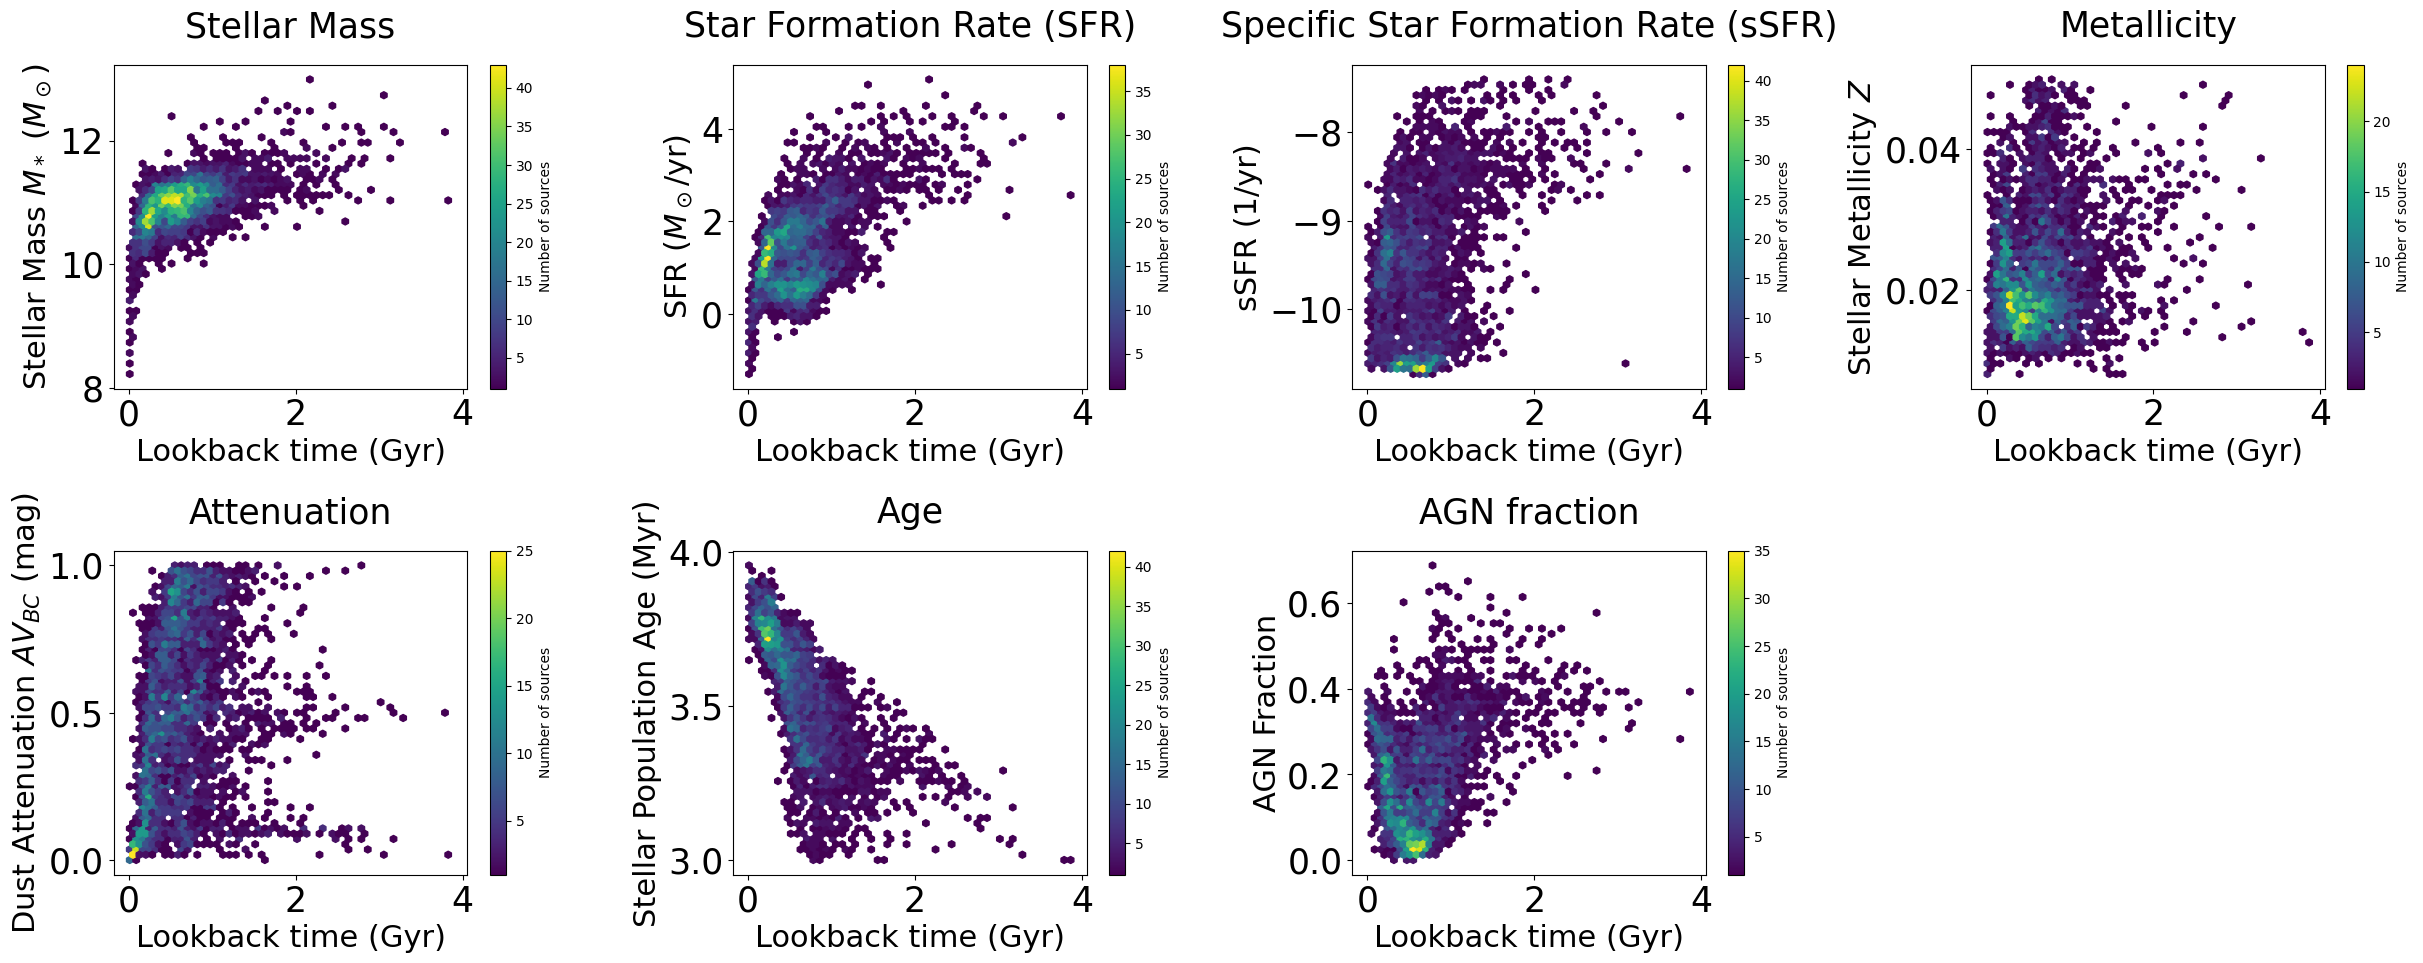

: 

In [ ]:
plot_properties_evolution(
    df=emu_sources_best,
    columns=[
        'bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass','bayes.stellar.metallicity',
        'bayes.attenuation.Av_BC', 'bayes.sfh.age', 'bayes.agn.fracAGN'
    ],
    y_labels=[
        r"Stellar Mass $M_*$ ($M_\odot$)",
        r"SFR ($M_\odot$/yr)",
        r"sSFR (1/yr)",
        r"Stellar Metallicity $Z$",
        r"Dust Attenuation $AV_{BC}$ (mag)",
        r"Stellar Population Age (Myr)",
        r"AGN Fraction"
    ],
    titles = ['Stellar Mass', 'Star Formation Rate (SFR)', 'Specific Star Formation Rate (sSFR)', 'Metallicity', 'Attenuation', 'Age', 'AGN fraction'],
    path = '/home/polaris/Lab_Astro/images/emu_propsevolution.png'
)

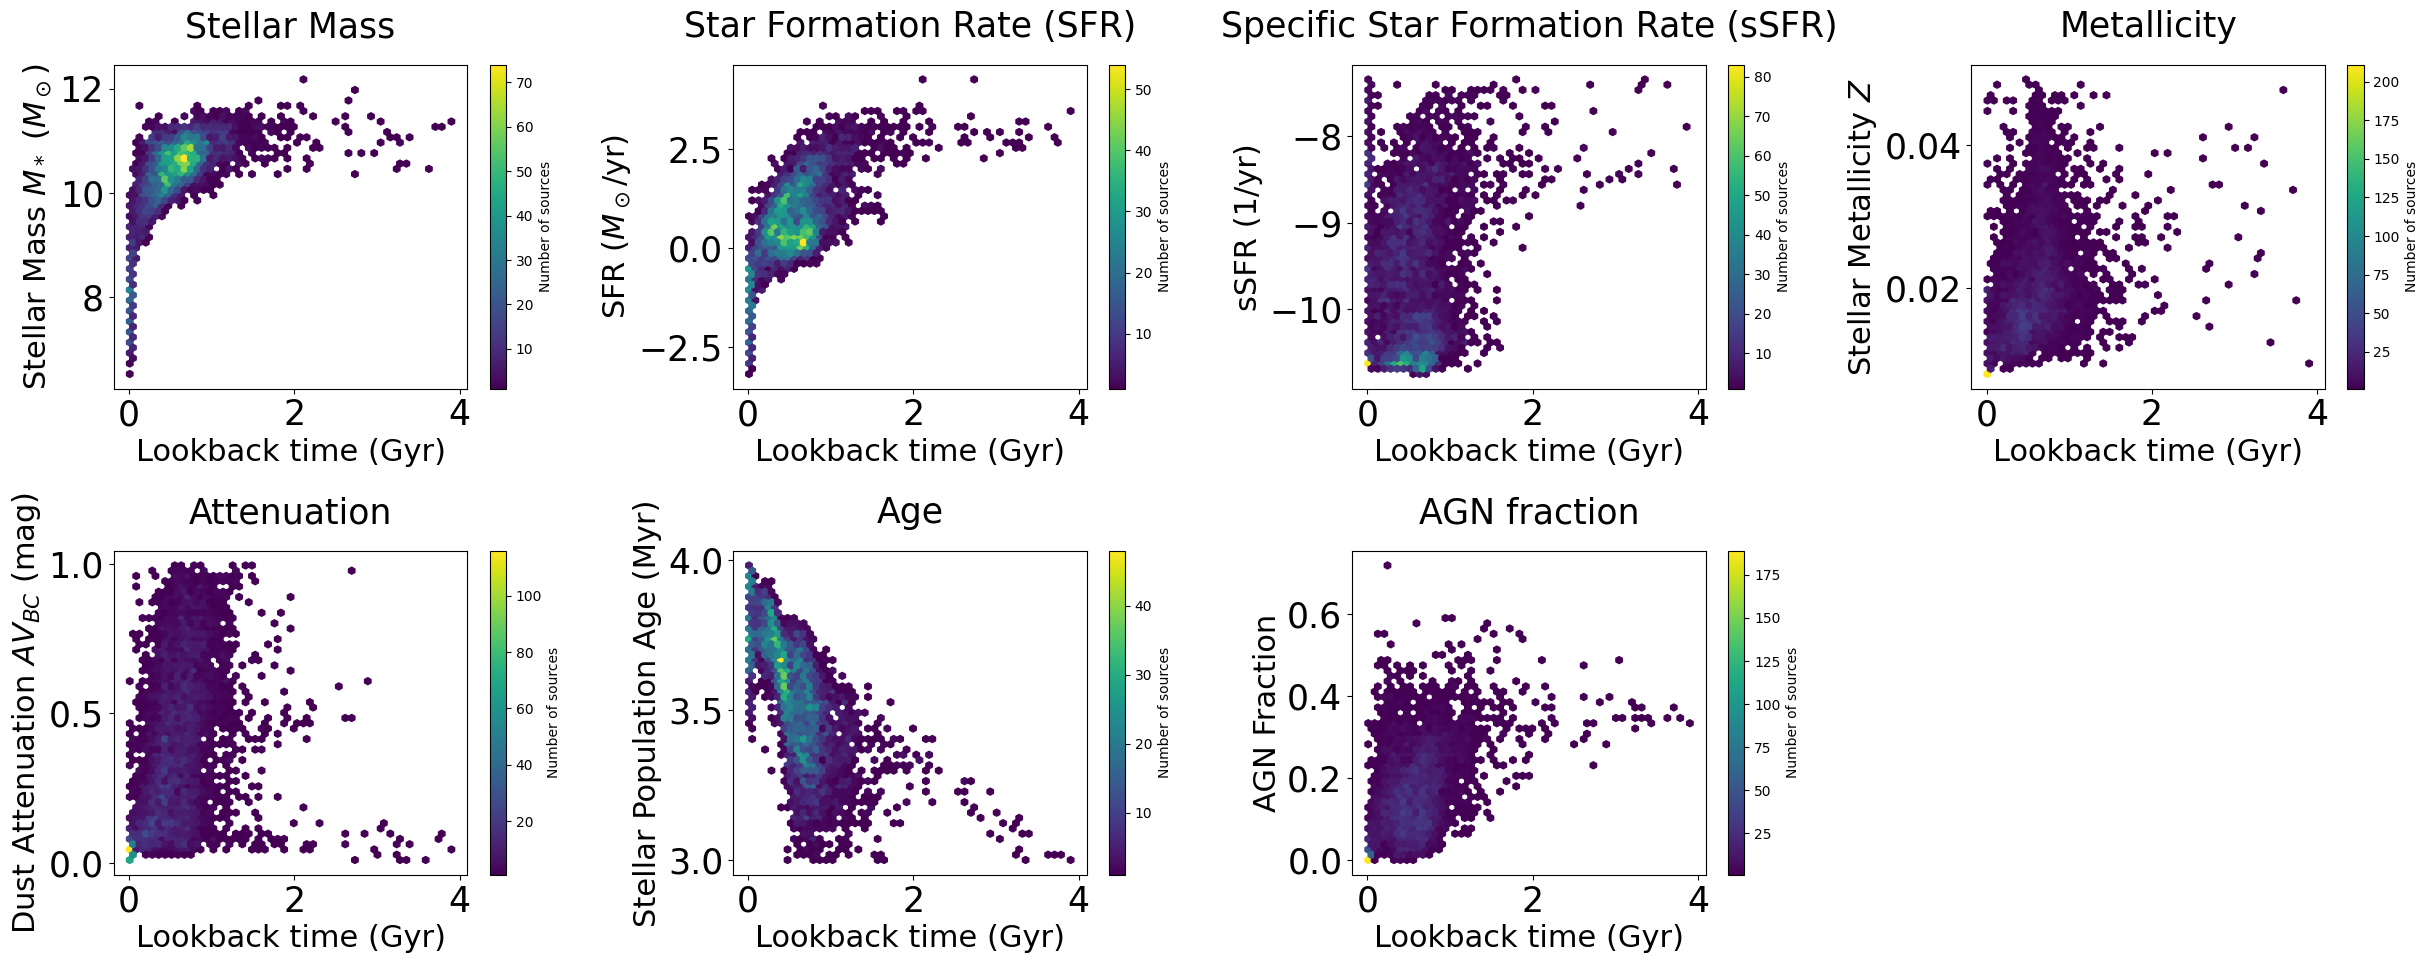

: 

In [ ]:
plot_properties_evolution(
    df=nonemu_samp_prots_best,
    columns=[
        'bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass','bayes.stellar.metallicity',
        'bayes.attenuation.Av_BC', 'bayes.sfh.age', 'bayes.agn.fracAGN'
    ],
    y_labels=[
        r"Stellar Mass $M_*$ ($M_\odot$)",
        r"SFR ($M_\odot$/yr)",
        r"sSFR (1/yr)",
        r"Stellar Metallicity $Z$",
        r"Dust Attenuation $AV_{BC}$ (mag)",
        r"Stellar Population Age (Myr)",
        r"AGN Fraction"
    ],
    titles = ['Stellar Mass', 'Star Formation Rate (SFR)', 'Specific Star Formation Rate (sSFR)', 'Metallicity', 'Attenuation', 'Age', 'AGN fraction'],
    path = '/home/polaris/Lab_Astro/images/nonemu_propsevolution.png'
)

In [ ]:
def plot_properties_evolution_countors(
    df1, df2, columns, y_labels, titles, path,
    figsize=(25, 10),
    title_fontsize=25,
    xlabel_fontsize=22,
    ylabel_fontsize=22,
    xtick_fontsize=25,
    ytick_fontsize=25,
    legend_fontsize=20,
    redshift=True,
):
    log_cols = ['bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass', 'bayes.sfh.age']

    n = len(columns)
    nrows = 2
    ncols = math.ceil(n / nrows)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, squeeze=False)
    legend_drawn = False

    for i, col in enumerate(columns):
        row = i // ncols
        col_idx = i % ncols
        ax = axes[row, col_idx]

        if redshift:
            x1 = df1['bayes.universe.redshift'].to_numpy()
            x2 = df2['bayes.universe.redshift'].to_numpy()
        else:
            x1 = cosmo.lookback_time(df1['bayes.universe.redshift']).to(u.Gyr).value
            x2 = cosmo.lookback_time(df2['bayes.universe.redshift']).to(u.Gyr).value

        y1 = df1[col].to_numpy()
        y2 = df2[col].to_numpy()

        if col in log_cols:
            y1 = np.log10(y1)
            y2 = np.log10(y2)

        sns.kdeplot(
            x=x1,
            y=y1,
            levels=6,
            fill=False,
            color='blue',
            linewidths=2,
            ax=ax
        )
        
        sns.kdeplot(
            x=x2,
            y=y2,
            levels=6,
            fill=False,
            color='red',
            linewidths=2,
            ax=ax
        )

        # if not redshift:
        #     ax.set_xscale("log")

        xlabel = "Redshift" if redshift else "Lookback Time (Gyr)"
        ax.set_xlabel(xlabel, fontsize=xlabel_fontsize)
        ax.set_ylabel(y_labels[i], fontsize=ylabel_fontsize)
        ax.tick_params(axis='x', labelsize=xtick_fontsize)
        ax.tick_params(axis='y', labelsize=ytick_fontsize)
        ax.set_title(titles[i], fontsize=title_fontsize, pad=20)

    for j in range(n, nrows * ncols):
        row = j // ncols
        col_idx = j % ncols
        ax = axes[row, col_idx]
        ax.axis('off')
        if not legend_drawn:
            ax.plot([], [], color='blue', label='EMU', linewidth=5)
            ax.plot([], [], color='red', label='Non-EMU', linewidth=5)
            ax.legend(fontsize=legend_fontsize, loc='center left')
            legend_drawn = True

    fig.subplots_adjust(
        left=0.05,
        right=0.97,
        top=0.90,
        bottom=0.09,
        wspace=0.40,
        hspace=0.50
    )
    plt.savefig(path, dpi=200)
    plt.show()

: 

In [ ]:
emu_sources_best['lookback_time'] = cosmo.lookback_time(emu_sources_best['bayes.universe.redshift']).to(u.Gyr).value
nonemu_samp_prots_best['lookback_time']  = cosmo.lookback_time(nonemu_samp_prots_best['bayes.universe.redshift']).to(u.Gyr).value

: 

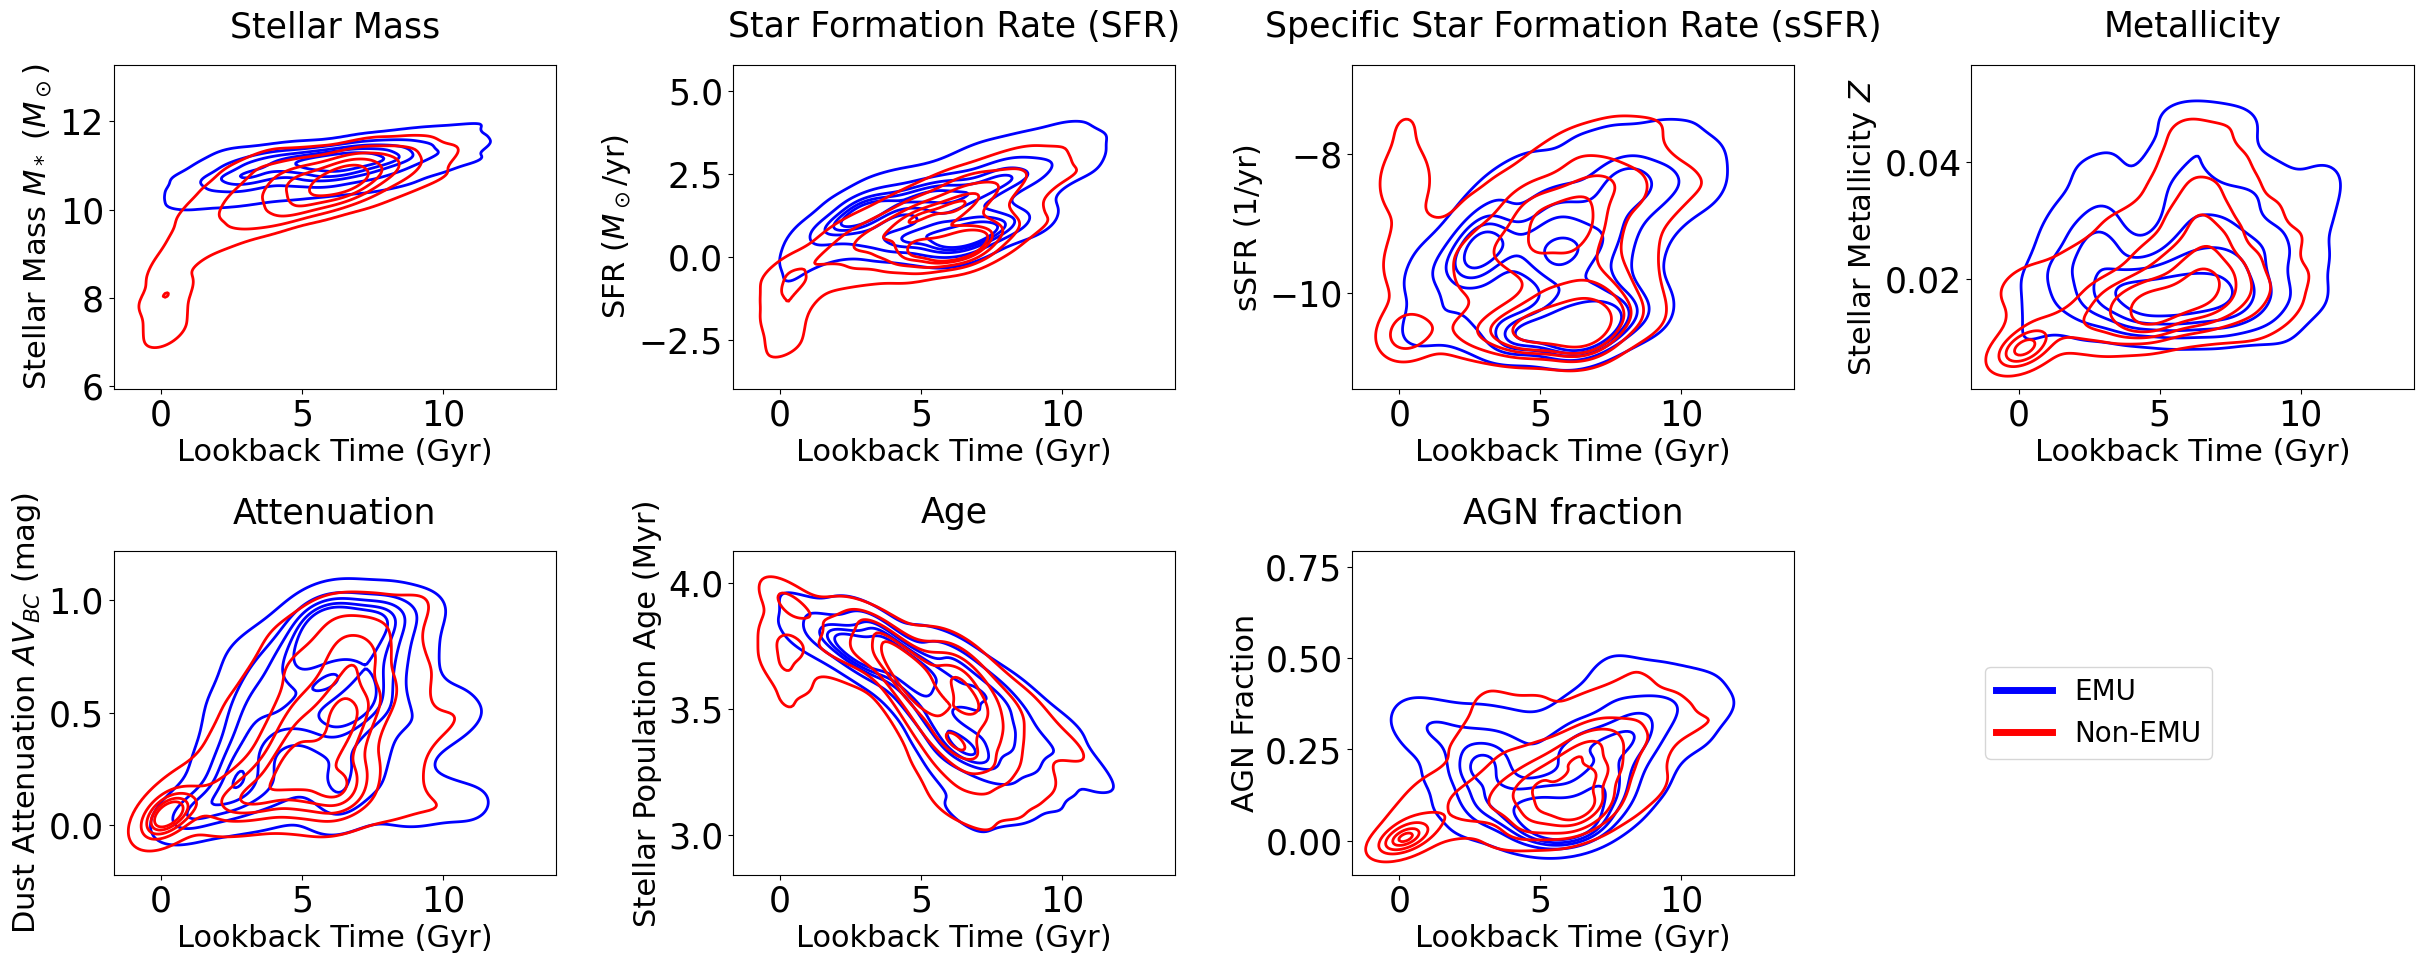

: 

In [ ]:
plot_properties_evolution_countors(
    df1=emu_sources_best,
    df2=nonemu_samp_prots_best,
    columns=[
        'bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass','bayes.stellar.metallicity',
        'bayes.attenuation.Av_BC', 'bayes.sfh.age', 'bayes.agn.fracAGN'
    ],
    y_labels=[
        r"Stellar Mass $M_*$ ($M_\odot$)",
        r"SFR ($M_\odot$/yr)",
        r"sSFR (1/yr)",
        r"Stellar Metallicity $Z$",
        r"Dust Attenuation $AV_{BC}$ (mag)",
        r"Stellar Population Age (Myr)",
        r"AGN Fraction"
    ],
    titles = ['Stellar Mass', 'Star Formation Rate (SFR)', 'Specific Star Formation Rate (sSFR)', 'Metallicity', 'Attenuation', 'Age', 'AGN fraction'],
    path = '/home/polaris/Lab_Astro/images/nonemu_propsevolution_countor.png',
    redshift=False
)

In [ ]:
def plot_properties_evolution_diff(
    df1, df2, columns, y_labels, titles, path,
    figsize=(25, 10),
    title_fontsize=25,
    xlabel_fontsize=22,
    ylabel_fontsize=22,
    xtick_fontsize=25,
    ytick_fontsize=25,
    legend_fontsize=20,
    cmap='coolwarm_r',  # diverging colormap: blue-white-red
    gridsize=50,
):
    log_cols = ['bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass', 'bayes.sfh.age']

    n = len(columns)
    nrows = 2
    ncols = math.ceil(n / nrows)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, squeeze=False)

    for i, col in enumerate(columns):
        row = i // ncols
        col_idx = i % ncols
        ax = axes[row, col_idx]

        # Extract and filter
        x1 = df1['bayes.universe.redshift']
        y1 = df1[col].copy()
        x2 = df2['bayes.universe.redshift']
        y2 = df2[col].copy()

        # Apply log where needed
        if col in log_cols:
            x1, y1 = x1, np.log10(y1)
            x2, y2 = x2, np.log10(y2)

        # Calculate 2D histograms
        xmin = min(x1.min(), x2.min())
        xmax = max(x1.max(), x2.max())
        ymin = min(y1.min(), y2.min())
        ymax = max(y1.max(), y2.max())

        xbins = np.linspace(xmin, xmax, gridsize + 1)
        ybins = np.linspace(ymin, ymax, gridsize + 1)

        hist1, _, _ = np.histogram2d(x1, y1, bins=[xbins, ybins])
        hist2, _, _ = np.histogram2d(x2, y2, bins=[xbins, ybins])

        hist1_norm = hist1 / hist1.sum()
        hist2_norm = hist2 / hist2.sum()

        with np.errstate(divide='ignore', invalid='ignore'):
            diff = (hist1_norm - hist2_norm) / (hist1_norm + hist2_norm)
            diff[np.isnan(diff)] = 0  # set 0/0 to 0

        # Prepare meshgrid for pcolormesh
        X, Y = np.meshgrid(xbins, ybins)

        # Normalize around 0 for diverging colormap
        vmax = np.abs(diff).max()
        norm = TwoSlopeNorm(vcenter=0, vmin=-vmax, vmax=vmax)

        # Plot the difference
        pcm = ax.pcolormesh(X, Y, diff.T, cmap=cmap, norm=norm, shading='auto')
        cb = fig.colorbar(pcm, ax=ax)
        cb.set_label('Δ (EMU - Non-EMU)', fontsize=legend_fontsize)

        # Labels and title
        ax.set_xlabel("Redshift ", fontsize=xlabel_fontsize)
        ax.set_ylabel(y_labels[i], fontsize=ylabel_fontsize)
        ax.tick_params(axis='x', labelsize=xtick_fontsize)
        ax.tick_params(axis='y', labelsize=ytick_fontsize)
        ax.set_title(titles[i], fontsize=title_fontsize, pad=20)

    # Turn off unused subplots
    for j in range(n, nrows * ncols):
        row = j // ncols
        col_idx = j % ncols
        axes[row, col_idx].axis('off')

    fig.subplots_adjust(
        left=0.05,
        right=0.97,
        top=0.90,
        bottom=0.09,
        wspace=0.40,
        hspace=0.50
    )
    plt.savefig(path, dpi=200)
    plt.show()


: 

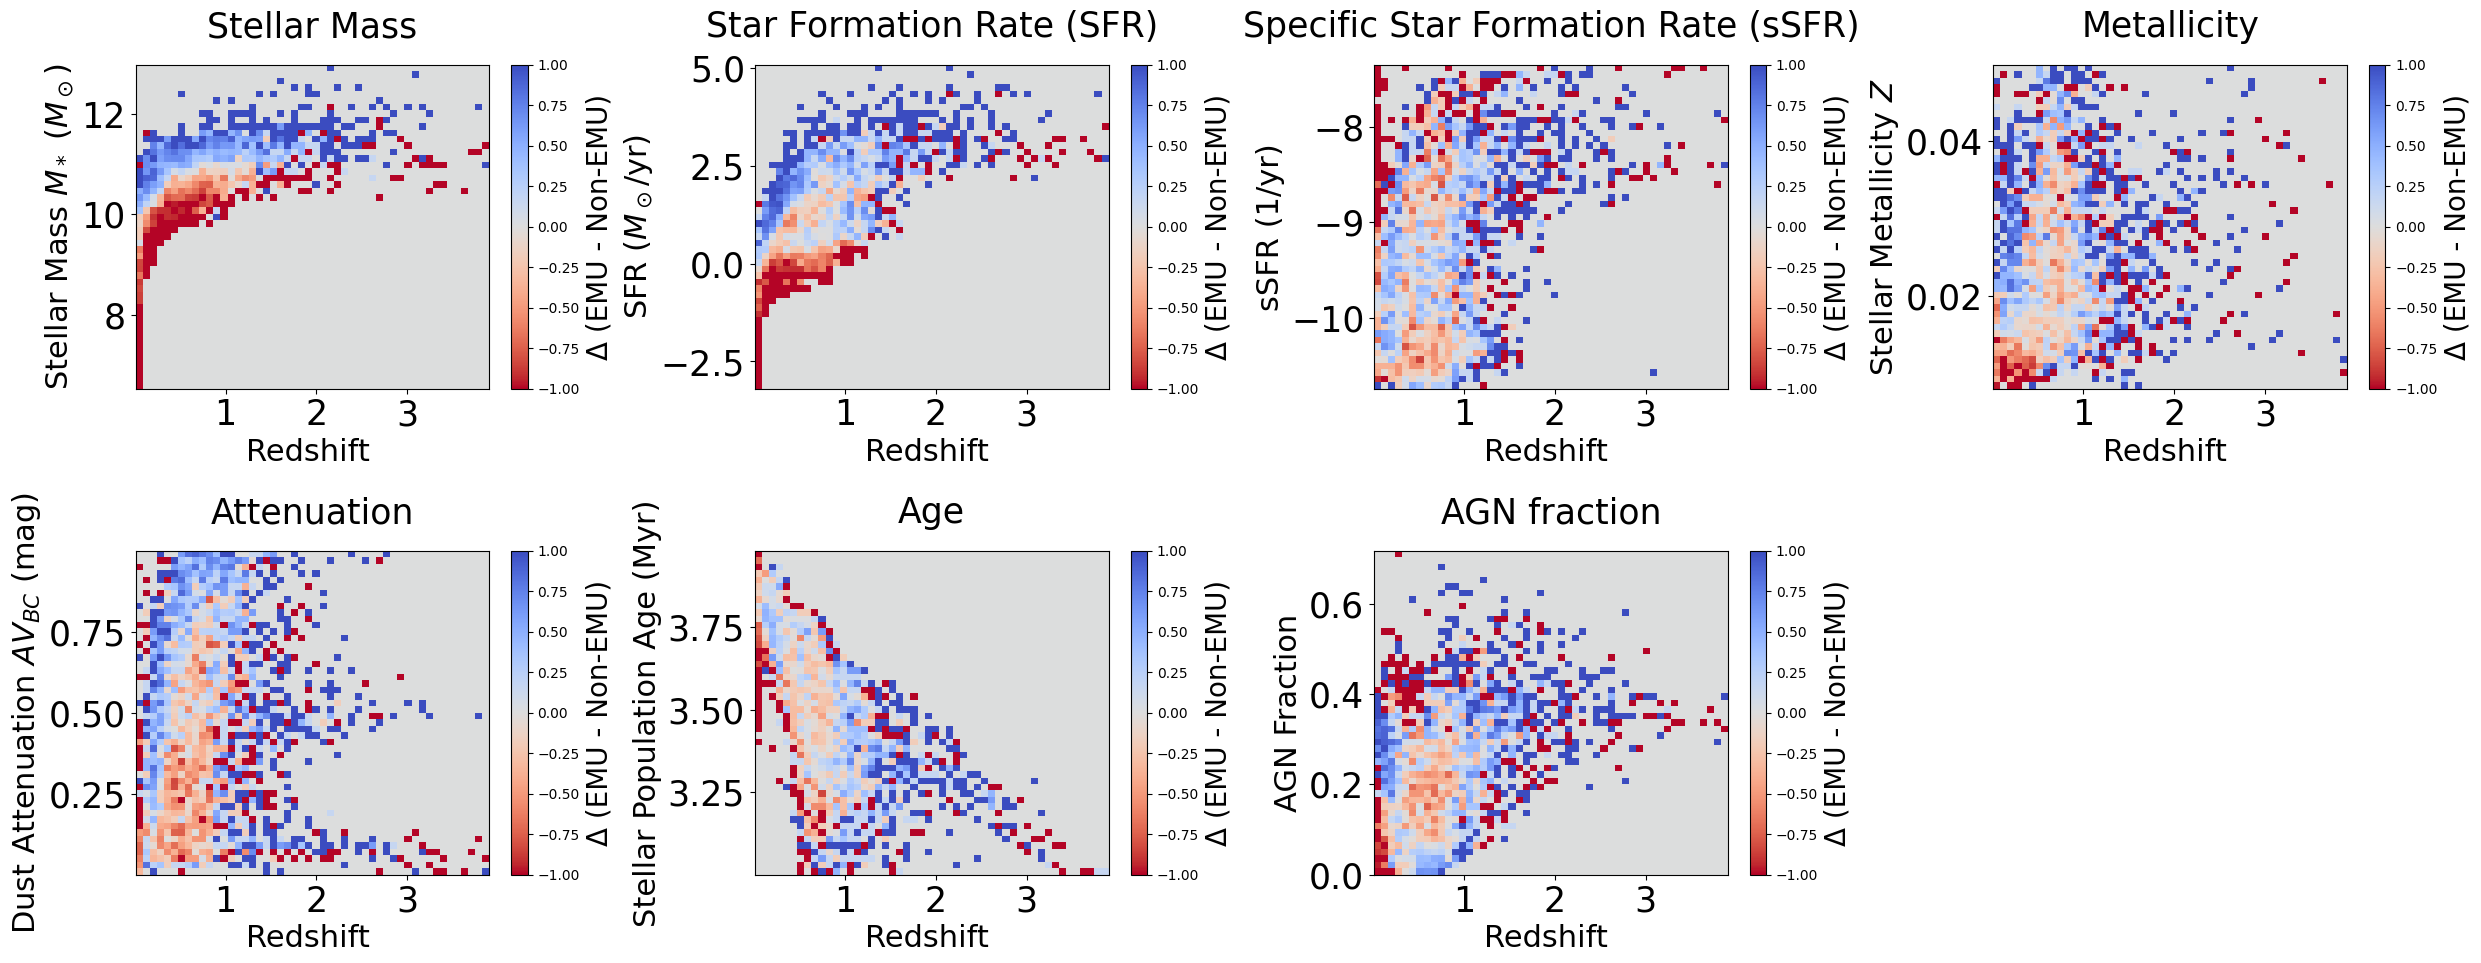

: 

In [ ]:
plot_properties_evolution_diff(
    df1=emu_sources_best,
    df2=nonemu_samp_prots_best,
    columns=[
        'bayes.stellar.m_star', 'bayes.sfh.sfr', 'bayes.sfh.sfr_permass','bayes.stellar.metallicity',
        'bayes.attenuation.Av_BC', 'bayes.sfh.age', 'bayes.agn.fracAGN'
    ],
    y_labels=[
        r"Stellar Mass $M_*$ ($M_\odot$)",
        r"SFR ($M_\odot$/yr)",
        r"sSFR (1/yr)",
        r"Stellar Metallicity $Z$",
        r"Dust Attenuation $AV_{BC}$ (mag)",
        r"Stellar Population Age (Myr)",
        r"AGN Fraction"
    ],
    titles = ['Stellar Mass', 'Star Formation Rate (SFR)', 'Specific Star Formation Rate (sSFR)', 'Metallicity', 'Attenuation', 'Age', 'AGN fraction'],
    path = '/home/polaris/Lab_Astro/images/nonemu_propsevolution_diff.png'
)